# Beti exekutatzeko

In [1]:
!nvidia-smi

Fri Jul  3 09:08:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install laserembeddings

     |████████████████████████████████| 860kB 4.8MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=53e85d758a1be8dfc156b8f67e7eaebc42502ecbc5c8686632f08667c0f7aa35
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built sacremoses


In [3]:
!python -m laserembeddings download-models


✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fcodes    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fvocab    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/bilstm.93langs.2018-12-26.pt    

✨ You're all set!


In [4]:
from laserembeddings import Laser

laser = Laser()

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import numpy as np

In [7]:
def similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [8]:
import random
import re

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [83]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


# Proba gehiago

In [17]:
def egiaztatu(es, en, eu, penalizazioa):
    embed = laser.embed_sentences([es, en, eu], ['es', 'es', 'eu'])
    sim1 = similarity(embed[0], embed[1])
    sim2 = similarity(embed[0], embed[2])
    sim3 = similarity(embed[1], embed[2])
    sim = sim1 + sim2 + sim3
    print(sim1, sim2, sim3, sim)
    return sim*penalizazioa

In [ ]:
egiaztatu('Yo le acariciaba los senos.', 'Toward the end of the show I kissed her, but rather clumsily.', 'Bularrak laztantzen nizkion.', 1)

0.5009856 0.81154907 0.44851813 1.7610528


1.7610528469085693

In [ ]:
egiaztatu('Yo le acariciaba los senos.', 'Toward the end of the show I kissed her, but rather clumsily.', 'Bularrak laztantzen nizkion.', 1)

In [ ]:
egiaztatu('Hacia el fin de la función, la besé, pero mal.', 'Toward the end of the show I kissed her, but rather clumsily.', 'Ia azkenean, besarkatu dut, baina gaizki.', 0.92)

0.7969294 0.7051839 0.6490159 2.1511292


1.9790389060974123

In [ ]:
emb_es = laser.embed_sentences(['Yo le acariciaba los senos.', 'Hacia el fin de la función, la besé, pero mal.'], 'es')
emb_en = laser.embed_sentences(['Toward the end of the show I kissed her, but rather clumsily.'], 'en')
emb_eu = laser.embed_sentences(['Bularrak laztantzen nizkion.', 'Ia azkenean, besarkatu dut, baina gaizki.'], 'eu')

lortu_onena([-1, -1, -1], emb_es, emb_en, emb_eu, dict(), inprimatu=True)

(1, 1, 1) 2.1240837574005127
(2, 1, 1) 1.5428993225097656
(1, 2, 1) -1.0
(1, 1, 2) 1.504244842529297
(2, 2, 1) -1.0
(1, 2, 2) -1.0
(2, 1, 2) 2.030713539123535
(3, 1, 1) -1.0
(1, 3, 1) -1.0
(1, 1, 3) -1.0
(3, 3, 1) -1.0
(1, 3, 3) -1.0
(3, 1, 3) -1.0
(3, 1, 2) -1.0
(3, 2, 1) -1.0
(1, 3, 2) -1.0
(2, 3, 1) -1.0
(1, 2, 3) -1.0
(2, 1, 3) -1.0


(1, 1, 1)

In [ ]:
emb_es = laser.embed_sentences(['Yo le acariciaba los senos.', 'Hacia el fin de la función, la besé, pero mal.'], 'es')
emb_en = laser.embed_sentences(['Toward the end of the show I kissed her, but rather clumsily.'], 'en')
emb_eu = laser.embed_sentences(['Bularrak laztantzen nizkion.', 'Ia azkenean, besarkatu dut, baina gaizki.'], 'eu')

lortu_onena([-1, -1, -1], emb_es, emb_en, emb_eu, dict(), inprimatu=True)

(1, 1, 1) 1.7610528469085693
(2, 1, 1) 1.5845531845092773
(1, 2, 1) -1.0
(1, 1, 2) 1.6156505584716796
(2, 2, 1) -1.0
(1, 2, 2) -1.0
(2, 1, 2) 1.9790386867523195
(3, 1, 1) -1.0
(1, 3, 1) -1.0
(1, 1, 3) -1.0
(3, 3, 1) -1.0
(1, 3, 3) -1.0
(3, 1, 3) -1.0
(3, 1, 2) -1.0
(3, 2, 1) -1.0
(1, 3, 2) -1.0
(2, 3, 1) -1.0
(1, 2, 3) -1.0
(2, 1, 3) -1.0


(2, 1, 2)

In [16]:
emb_es = laser.embed_sentences(['Por encima de la Tierra y sus océanos el hombre medieval imaginaba que primero habría una capa de aire luego una capa de fuego',
                                'y más allá del fuego los planetas, cuerpos celestiales en movimiento.',
                                'Cada planeta estaba ligado a su esfera, móvil y transparente.'], 'es')
emb_en = laser.embed_sentences(['Above the earth and its waters - - the medieval man first imagined a layer of air - - then a layer of fire -',
                                '- and outside the fire were the planets, moving celestial bodies.',
                                'Each planet was attached to its transparent, movable sphere.'], 'en')
emb_eu = laser.embed_sentences(['Lurretik eta hango uretatik kanpo Erdi Aroko gizakiak aire-geruza bat irudikatzen zuen, aurrenik eta, gero, su-geruza bat.',
                                'Eta, sutik harago, planetak imajinatzen zituen, geldirik.',
                                'Planeta bakoitza bere esfera garden, mugikorrari atxikia zegoen.'], 'eu')

lortu_onena([-1, -1, -1], emb_es, emb_en, emb_eu, dict(), inprimatu=True)

(1, 1, 1) 1.5882596969604492
(2, 1, 1) 1.1567887115478515
(1, 2, 1) 1.9655726623535155
(1, 1, 2) 1.1913487243652343
(2, 2, 1) 1.941701765060425
(1, 2, 2) 1.8199770832061768
(2, 1, 2) 1.0026989126205446
(3, 1, 1) 1.10441725730896
(1, 3, 1) 1.7910272908210754
(1, 1, 3) 1.1740080738067626
(3, 3, 1) 1.8050311660766603
(1, 3, 3) 1.6967874717712403
(3, 1, 3) 1.074934616088867
(3, 1, 2) 0.9272482395172119
(3, 2, 1) 1.650711464881897
(1, 3, 2) 1.6353057146072387
(2, 3, 1) 1.6231203317642213
(1, 2, 3) 1.7377212524414063
(2, 1, 3) 1.0060529351234437


(1, 2, 1)

In [80]:
egiaztatu('Por encima de la Tierra y sus océanos el hombre medieval imaginaba que primero habría una capa de aire luego una capa de fuego',
          '- Above the earth and its waters the medieval man first imagined a layer of air then a layer of fire -',
          'Lurretik eta hango uretatik kanpo Erdi Aroko gizakiak aire-geruza bat irudikatzen zuen, aurrenik eta, gero, su-geruza bat.',
          1)

0.57007813 0.8089285 0.52546865 1.9044752


1.904475212097168

In [76]:
egiaztatu('Cada planeta estaba ligado a su esfera, móvil y transparente',
          'Each planet was attached to its transparent, movable sphere',
          'Planeta bakoitza bere esfera garden, mugikorrari atxikia zegoen',
          1)

0.90789074 0.7952717 0.7630282 2.4661906


2.4661905765533447

In [58]:
proba_en = get_embeddings('en_proba.raw')

(4, 1024)


In [59]:
print(similarity(emb_es[0], proba_en[0])) # marra bukaeran.             le: 0.39
print(similarity(emb_es[0], proba_en[1])) # marrarik ez.                le: 0.77
print(similarity(emb_es[0], proba_en[2])) # marra hasieran.             le: 0.91
print(similarity(emb_es[0], proba_en[3])) # marra hasieran eta bukaeran le: 0.57

0.3942843
0.5091874
0.8944192
0.50377166


## OS checkpoint

In [84]:
with open('OpenSubtitles/OS-train2-es.txt') as text1_f:
    lerroak_es = text1_f.read().split('\n')
with open('OpenSubtitles/OS-train2-en.txt') as text2_f:
    lerroak_en = text2_f.read().split('\n')
with open('OpenSubtitles/OS-train2-eu.txt') as text3_f:
    lerroak_eu = text3_f.read().split('\n')

In [85]:
tarteak_guzt = 9 * [0]

for i in range(len(lerroak_es)):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = max([len1, len2, len3])
        if luzera < 11:
            tarteak_guzt[0] += 1
        elif luzera < 21:
            tarteak_guzt[1] += 1
        elif luzera < 31:
            tarteak_guzt[2] += 1
        elif luzera < 41:
            tarteak_guzt[3] += 1
        elif luzera < 51:
            tarteak_guzt[4] += 1
        elif luzera < 61:
            tarteak_guzt[5] += 1
        elif luzera < 71:
            tarteak_guzt[6] += 1
        elif luzera < 81:
            tarteak_guzt[7] += 1
        else:
            tarteak_guzt[8] += 1

In [86]:
for zenbat in tarteak_guzt:
    print(zenbat)

594649
111771
14672
2517
543
96
27
9
3


In [90]:
embeddings_es = get_embeddings('os_es_embeddings.raw')
embeddings_en = get_embeddings('os_en_embeddings.raw')
embeddings_eu = get_embeddings('os_eu_embeddings.raw')

(724287, 1024)
(724287, 1024)
(724287, 1024)


In [91]:
tarteak_kont = 9 * [0]

for i in range(len(lerroak_es)):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        len_konp = max([len1, len2, len3])
        atalasea = atalase_fun(len_konp)
        if sim1 > atalasea and sim2 > atalasea and sim3 > atalasea:
            if len_konp < 11:
                tarteak_kont[0] += 1
            elif len_konp < 21:
                tarteak_kont[1] += 1
            elif len_konp < 31:
                tarteak_kont[2] += 1
            elif len_konp < 41:
                tarteak_kont[3] += 1
            elif len_konp < 51:
                tarteak_kont[4] += 1
            elif len_konp < 61:
                tarteak_kont[5] += 1
            elif len_konp < 71:
                tarteak_kont[6] += 1
            elif len_konp < 81:
                tarteak_kont[7] += 1
            else:
                tarteak_kont[8] += 1

In [92]:
for zenbat in tarteak_kont:
    print(zenbat)

470953
69293
9050
1434
267
32
7
1
0


In [93]:
sum(tarteak_kont)

551037

In [94]:
for tartea, tartea_guztira in zip(tarteak_kont, tarteak_guzt):
    print(tartea / tartea_guztira * 100)

79.19848515678997
61.9955086739852
61.68211559432933
56.97258641239571
49.171270718232044
33.33333333333333
25.925925925925924
11.11111111111111
0.0


# Hasierako probak

In [ ]:
embeddings = laser.embed_sentences(
    ['I love pasta.',
     "J'adore les pâtes.",
     'Ich liebe Pasta.'],
    lang=['en', 'fr', 'de'])

In [ ]:
esaldiak = ['Amonarenera',
            'Hiri Handitik gatoz.',
            'Gau osoan bidaiatu dugu.',
            'Amak gorriturik dauzka begiak.',
            'Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, zeina, besoak nekatzen zaizkigunean, batak besteari pasatzen baitiogu.',
            "Arrival at Grandmother's",
            "We arrive from the Big Town.",
            "We've been traveling all night.",
            "Mother's eyes are red.",
            "She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired.",
            'La llegada a casa de la abuela',
            'Venimos de la ciudad.',
            'Hemos viajado toda la noche.',
            'Nuestra madre tiene los ojos rojos.',
            'Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.']
hizkuntzak = 5 * ['eu'] + 5 * ['en'] + 5 * ['es']

In [ ]:
embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)

In [ ]:
for esaldia_a, emb_a in zip(esaldiak, embeddings):
    print()
    print(esaldia_a)
    for esaldia_b, emb_b in zip(esaldiak, embeddings):
        print(similarity(emb_a, emb_b), esaldia_b)


Amonarenera
1.0 Amonarenera
0.46800447 Hiri Handitik gatoz.
0.2850285 Gau osoan bidaiatu dugu.
0.39163893 Amak gorriturik dauzka begiak.
0.26320115 Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, zeina, besoak nekatzen zaizkigunean, batak besteari pasatzen baitiogu.
0.71410173 Arrival at Grandmother's
0.41016006 We arrive from the Big Town.
0.23638943 We've been traveling all night.
0.38402054 Mother's eyes are red.
0.25780115 She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired.
0.6082363 La llegada a casa de la abuela
0.41098747 Venimos de la ciudad.
0.27923614 Hemos viajado toda la noche.
0.35814026 Nuestra madre tiene los ojos rojos.
0.2575898 Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre

In [ ]:
esaldiak = ['Amonarenera. Hiri Handitik gatoz.',
            'Hiri Handitik gatoz.',
            'Hiri Handitik gatoz. Gau osoan bidaiatu dugu.',
            'We arrive from the Big Town.',
            'Venimos de la ciudad.']
hizkuntzak = 3 * ['eu'] + ['en', 'es']

In [ ]:
embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)

In [ ]:
print(similarity(embeddings[0], embeddings[3]))
print(similarity(embeddings[1], embeddings[3]))
print(similarity(embeddings[2], embeddings[3]))
print()
print(similarity(embeddings[0], embeddings[4]))
print(similarity(embeddings[1], embeddings[4]))
print(similarity(embeddings[2], embeddings[4]))

0.7136638
0.84882313
0.6085749

0.6608428
0.82055676
0.5832961


In [ ]:
# Orain dagoen bezala:
esaldiak = ['Jende gutxi dabil kalean;',
            'hiria isilik dago.',
            'Geure pausoen hotsa entzun dezakegu;',
            'Los caminantes son poco numerosos, el pueblo está silencioso.',
            'Se oye el ruido de nuestros pasos.',
            '',
            "There aren't many people in the streets.",
            'The town is very quiet.',
            'Our footsteps echo on the pavement;'
            ]
hizkuntzak = 3 * ['eu'] + 3 * ['es'] + 3 * ['en']

embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)

In [ ]:
print(similarity(embeddings[0], embeddings[3]), similarity(embeddings[0], embeddings[6]))
print(similarity(embeddings[1], embeddings[4]), similarity(embeddings[1], embeddings[7]))
print(similarity(embeddings[2], embeddings[5]), similarity(embeddings[2], embeddings[8]))

0.6795983 0.782087
0.45281586 0.85209507
0.12815471 0.6507762


In [ ]:
# Ondo jarrita:
esaldiak = ['Jende gutxi dabil kalean;',
            'hiria isilik dago.',
            'Geure pausoen hotsa entzun dezakegu;',
            'Los caminantes son poco numerosos,',
            'el pueblo está silencioso.',
            'Se oye el ruido de nuestros pasos.',
            "There aren't many people in the streets.",
            'The town is very quiet.',
            'Our footsteps echo on the pavement;'
            ]
hizkuntzak = 3 * ['eu'] + 3 * ['es'] + 3 * ['en']

embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)

In [ ]:
print(similarity(embeddings[0], embeddings[3]), similarity(embeddings[0], embeddings[6]))
print(similarity(embeddings[1], embeddings[4]), similarity(embeddings[1], embeddings[7]))
print(similarity(embeddings[2], embeddings[5]), similarity(embeddings[2], embeddings[8]))

0.6600838 0.7820871
0.8813914 0.85209507
0.78189725 0.6507762


In [ ]:
# Orain dagoen bezala:
esaldiak = ["Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.",
            "Bi arrautza frijitu ditut eta ogi gabe jan, ogia erosteko gogorik ez nuelako.",
            "Bazkalondoan pixka bat aspertu naiz eta batetik bestera ibili naiz etxean.",
            "No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.",
            "Cocí unos huevos y los comí solos, sin pan, porque no tenía más y no quería bajar a comprarlo.",
            "Después del almuerzo me aburrí un poco y erré por el departamento.",
            "I decided not to lunch at Céleste's restaurant as I usually did;",
            "they'd be sure to pester me with questions, and I dislike being questioned.",
            "So I fried some eggs and ate them off the pan."]
hizkuntzak = 3 * ['eu'] + 3 * ['es'] + 3 * ['en']
embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)

In [ ]:
print(similarity(embeddings[0], embeddings[3]), similarity(embeddings[0], embeddings[6]))
print(similarity(embeddings[1], embeddings[4]), similarity(embeddings[1], embeddings[7]))
print(similarity(embeddings[2], embeddings[5]), similarity(embeddings[2], embeddings[8]))

0.8219921 0.6718689
0.8030667 0.5313047
0.80124503 0.5750171


In [ ]:
# Ondo jarrita:
esaldiak = ["Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.",
            "Bi arrautza frijitu ditut eta ogi gabe jan, ogia erosteko gogorik ez nuelako.",
            "Bazkalondoan pixka bat aspertu naiz eta batetik bestera ibili naiz etxean.",
            "No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.",
            "Cocí unos huevos y los comí solos, sin pan, porque no tenía más y no quería bajar a comprarlo.",
            "Después del almuerzo me aburrí un poco y erré por el departamento.",
            "I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.",
            "So I fried some eggs and ate them off the pan. I did without bread as there wasn't any left, and I couldn't be bothered going down to buy it.",
            ""]
hizkuntzak = 3 * ['eu'] + 3 * ['es'] + 3 * ['en']
embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)
print(similarity(embeddings[0], embeddings[3]), similarity(embeddings[0], embeddings[6]))
print(similarity(embeddings[1], embeddings[4]), similarity(embeddings[1], embeddings[7]))
print(similarity(embeddings[2], embeddings[5]), similarity(embeddings[2], embeddings[8]))

0.82199204 0.75433874
0.8030667 0.7538308
0.80124503 0.006082147


In [ ]:
# Ingelesezko azkena elkartu gabe (bat ere ez hutsik):
esaldiak = ["Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.",
            "Bi arrautza frijitu ditut eta ogi gabe jan, ogia erosteko gogorik ez nuelako.",
            "Bazkalondoan pixka bat aspertu naiz eta batetik bestera ibili naiz etxean.",
            "No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.",
            "Cocí unos huevos y los comí solos, sin pan, porque no tenía más y no quería bajar a comprarlo.",
            "Después del almuerzo me aburrí un poco y erré por el departamento.",
            "I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.",
            "So I fried some eggs and ate them off the pan.",
            "I did without bread as there wasn't any left, and I couldn't be bothered going down to buy it."]
hizkuntzak = 3 * ['eu'] + 3 * ['es'] + 3 * ['en']
embeddings = laser.embed_sentences(esaldiak, lang=hizkuntzak)
print(similarity(embeddings[0], embeddings[3]), similarity(embeddings[0], embeddings[6]))
print(similarity(embeddings[1], embeddings[4]), similarity(embeddings[1], embeddings[7]))
print(similarity(embeddings[2], embeddings[5]), similarity(embeddings[2], embeddings[8]))

0.82199216 0.75433874
0.8030667 0.68423396
0.80124503 0.56412166


**Batezbestekoak**
*   Dagoen bezala: 0,7
*   Bat ere ez hutsik: 0,735
*   Ondo jarrita, guztiak kontatuta: 0,66
*   Ondo jarrita, hutsa kontatu gabe: 0,784
*   Ondo jarrita, hutsa 0,5 kontatuta: 0,737


In [ ]:
import collections
x = 3
ilara = collections.deque(x * 2 * [0], x * 2)

In [ ]:
ilara.append(21)

In [ ]:
print(ilara)

deque([5, 11, 11, 12, 20, 21], maxlen=6)


# Irakurri

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
esaldiak_es = []
esaldiak_en = []
esaldiak_eu = []

with open('EhuHac/EhuHac-es.txt') as f1, \
     open('EhuHac/EhuHac-en.txt') as f2, \
     open('EhuHac/EhuHac-eu.txt') as f3:
    for _ in range(10_000):
        f1.readline()
        f2.readline()
        f3.readline()
    for _ in range(200):
        esaldiak_es.append(f1.readline()[:-1])
        esaldiak_en.append(f2.readline()[:-1])
        esaldiak_eu.append(f3.readline()[:-1])

In [ ]:
esaldiak_es = [esaldia for esaldia in esaldiak_es if esaldia]
esaldiak_en = [esaldia for esaldia in esaldiak_en if esaldia]
esaldiak_eu = [esaldia for esaldia in esaldiak_eu if esaldia]

In [ ]:
embeddings = laser.embed_sentences(
    ['Probatxo bat',
     "Probatxo bat.",
     'Probatxo bat.\n'],
    lang=['eu', 'eu', 'eu'])

In [ ]:
print(embeddings[0] == embeddings[1])
print(embeddings[1] == embeddings[2])

[False False False ... False False False]
[ True  True  True ...  True  True  True]


# Lehenengo saiakera

In [ ]:
import collections

In [ ]:
def lortu_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, posizioak):
    esaldiak = [esaldiak_es[posizioak[0]], 
                ' '.join(esaldiak_es[posizioak[0] : posizioak[0] + 2]),
                esaldiak_en[posizioak[1]], 
                ' '.join(esaldiak_en[posizioak[1] : posizioak[1] + 2]),
                esaldiak_eu[posizioak[2]], 
                ' '.join(esaldiak_eu[posizioak[2] : posizioak[2] + 2])]
    return esaldiak

In [ ]:
def lortu_onenak(ilara_hautagaiak, k):
    baturak = np.zeros(len(ilara_hautagaiak))
    for i in range(len(ilara_hautagaiak)):
        baturak[i] = sum(ilara_hautagaiak[i])
    return np.argsort(-baturak)[:k]

In [ ]:
def aukeraren_esaldiak(esaldiak, aukera):
    if aukera[0] == 0:
        esaldia_es = ''
    else:
        esaldia_es = esaldiak[aukera[0] - 1]
    
    if aukera[1] == 0:
        esaldia_en = ''
    else:
        esaldia_en = esaldiak[aukera[1] + 1]
    
    if aukera[2] == 0:
        esaldia_eu = ''
    else:
        esaldia_eu = esaldiak[aukera[2] + 3]

    return [esaldia_es, esaldia_en, esaldia_eu]

In [ ]:
def kalkulatu_puntuak(aukerak, embeddings, aukeren_puntuak):
    for aukera_ix in range(len(aukerak)):
        if aukerak[aukera_ix][0] == 0 or aukerak[aukera_ix][2] == 0:
            sim = 0.5
        else:
            emb1 = embeddings[aukerak[aukera_ix][0] - 1]
            emb2 = embeddings[aukerak[aukera_ix][2] + 3]
            sim = similarity(emb1, emb2)
        aukeren_puntuak[aukera_ix].append(sim)
        
        if aukerak[aukera_ix][1] == 0 or aukerak[aukera_ix][2] == 0:
            sim = 0.6
        else:
            emb1 = embeddings[aukerak[aukera_ix][1] + 1]
            emb2 = embeddings[aukerak[aukera_ix][2] + 3]
            sim = similarity(emb1, emb2)
        aukeren_puntuak[aukera_ix].append(sim)

In [ ]:
k = 4
x = 3

aukerak = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (0, 1, 1), (1, 0, 1),
           (1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2)]

esaldiak = lortu_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, [0, 0, 0])
hizkuntzak = ['es', 'es', 'en', 'en', 'eu', 'eu']
laser = Laser()
embeddings = laser.embed_sentences(esaldiak, hizkuntzak)

aukeren_puntuak = [collections.deque(x * 2 * [0], x * 2) 
                   for _ in range(len(aukerak))]

kalkulatu_puntuak(aukerak, embeddings, aukeren_puntuak)

onenak = lortu_onenak(aukeren_puntuak, k)
puntuak = [aukeren_puntuak[onenak[k_ix]] for k_ix in range(k)]

posizioak = [np.array(aukerak[onenak[k_ix]]) for k_ix in range(k)]
bukatuak = k * [False]

hautagaiak = [[aukeraren_esaldiak(esaldiak, aukerak[onenak[k_ix]])] 
              for k_ix in range(k)]

esaldi_kop = len(esaldiak_es)

#while not all(bukatuak):
for i in range(30):
    print(i)
    guztien_puntuak = []
    esaldi_guztiak = []
    for k_ix in range(k):
        esaldiak = lortu_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, 
                                  posizioak[k_ix])
        esaldi_guztiak.append(esaldiak)
        embeddings = laser.embed_sentences(esaldiak, hizkuntzak)
        aukeren_puntuak = [puntuak[k_ix].copy() for _ in range(len(aukerak))]
        kalkulatu_puntuak(aukerak, embeddings, aukeren_puntuak)
        guztien_puntuak.extend(aukeren_puntuak)
    onenak = lortu_onenak(guztien_puntuak, k)
    puntuak = [guztien_puntuak[onenak[k_ix]] for k_ix in range(k)]
    posizioak_zaharra = posizioak.copy()
    hautagaiak_berria = []
    for k_ix in range(k):
        aukera = aukerak[onenak[k_ix] % len(aukerak)]
        k_zaharra = onenak[k_ix] // len(aukerak)
        posizioak[k_ix] = posizioak_zaharra[k_zaharra] + aukera
        esaldiak = aukeraren_esaldiak(esaldi_guztiak[k_zaharra], aukera)
        kopia = hautagaiak[k_zaharra].copy()
        kopia.append(esaldiak)
        hautagaiak_berria.append(kopia)
    hautagaiak = hautagaiak_berria

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
for esaldia in hautagaiak[0]:
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. After that I stayed in bed until noon, smoking cigarettes.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

Cocí unos huevos y los comí solos, sin pan, porque no tenía más y no 

In [ ]:
for esaldia in hautagaiak[0]:
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. After that I stayed in bed until noon, smoking cigarettes.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

Cocí unos huevos y los comí solos, sin pan, porque no tenía más y no 

# Saiakera berria

In [ ]:
def lortu_hurrengo_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, posizioak):
    esaldiak = [esaldiak_es[posizioak[0] + 1], 
                esaldiak_es[posizioak[0] + 2],
                esaldiak_en[posizioak[1] + 1], 
                esaldiak_en[posizioak[1] + 2],
                esaldiak_eu[posizioak[2] + 1], 
                esaldiak_eu[posizioak[2] + 2]]
    return esaldiak

In [ ]:
def gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, 
                        posizioak, aukera):

    esaldia_es = ' '.join(esaldiak_es[posizioak[0] : posizioak[0] + aukera[0]])
    esaldia_en = ' '.join(esaldiak_en[posizioak[1] : posizioak[1] + aukera[1]])
    esaldia_eu = ' '.join(esaldiak_eu[posizioak[2] : posizioak[2] + aukera[2]])
    print('Posizioak:', posizioak)
    print(esaldia_es, esaldia_en, esaldia_eu)
    return esaldia_es, esaldia_en, esaldia_eu

In [ ]:
aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2)]
posizioak = np.array([0, 0, 0])
laser = Laser()
hizkuntzak = ['es', 'es', 'en', 'en', 'eu', 'eu']
konponduta = []
for i in range(100):
    print(i)
    esaldiak = lortu_hurrengo_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, 
                                       posizioak)
    embeddings = laser.embed_sentences(esaldiak, hizkuntzak)
    antzekotasunak = []
    for aukera in aukerak:
        emb1 = embeddings[aukera[0] - 1]
        emb2 = embeddings[aukera[1] + 1]
        emb3 = embeddings[aukera[2] + 3]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        antzekotasunak.append(sim)
    print(antzekotasunak)
    antzekotasunak = np.array(antzekotasunak)
    onena = antzekotasunak.argmax()
    print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena]))
    posizioak += aukerak[onena]

0
[1.66938, 1.3264067, 1.2521591, 1.00303, 0.9091859, 1.4159861, 1.3981718]
(1, 1, 1)
Posizioak: [0 0 0]
La llegada a casa de la abuela Arrival at Grandmother's Amonarenera
1
[1.8111278, 1.2103368, 1.2408274, 0.581307, 0.6400364, 1.0873373, 1.1764227]
(1, 1, 1)
Posizioak: [1 1 1]
Venimos de la ciudad. We arrive from the Big Town. Hiri Handitik gatoz.
2


/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [10] is 10 which does not match the computed number of elements 13. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (13,).
/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [13] is 13 which does not match the computed number of elements 64. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (64,).


[1.6824529, 1.22752, 1.315358, 0.7985981, 0.860425, 1.264494, 1.2456542]
(1, 1, 1)
Posizioak: [2 2 2]
Hemos viajado toda la noche. We've been traveling all night. Gau osoan bidaiatu dugu.
3
[1.71155, 1.1675403, 1.1822631, 0.67671937, 0.63825357, 1.2344315, 1.2143595]
(1, 1, 1)
Posizioak: [3 3 3]
Nuestra madre tiene los ojos rojos. Mother's eyes are red. Amak gorriturik dauzka begiak.
4
[1.7720718, 1.241193, 1.218051, 0.69828165, 0.6871722, 1.2410825, 1.2291031]
(1, 1, 1)
Posizioak: [4 4 4]
Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados. She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired. Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, 

/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [64] is 64 which does not match the computed number of elements 70. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (70,).


[1.641578, 1.4617119, 1.5135379, 1.3221548, 1.3336718, 1.5367799, 1.5569389]
(1, 1, 1)
Posizioak: [107 108 110]
Allí es donde guardamos el cuaderno de las redacciones, el diccionario de nuestro padre y los demás objetos que nos vemos obligados a esconder. That's where we hide the notebook, Father's dictionary, and the other things we're obliged to conceal. Hantxe goian gordetzen baititugu idazketa-koadernoa, Aitaren hiztegia eta ezkutatzera beharturik gauden gainerako gauzak.


In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos huevos y los comí solos, sin pan, porque no tenía 

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
La llegada a casa de la abuela
Arrival at Grandmother's
Amonarenera

2
Venimos de la ciudad.
We arrive from the Big Town.
Hiri Handitik gatoz.

3
Hemos viajado toda la noche.
We've been traveling all night.
Gau osoan bidaiatu dugu.

4
Nuestra madre tiene los ojos rojos.
Mother's eyes are red.
Amak gorriturik dauzka begiak.

5
Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.
She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired.
Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, zeina, besoak nekatzen zaizkigunean, batak besteari pasatzen baitiogu.

6
Andamos mucho rato.
We walk for a long time.
Ibili gabiltza luzaroan.

7
La casa de la abue

# Aurreko berdina baina 3 antzekotasunekin


In [ ]:
aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2)]
posizioak = np.array([0, 0, 0])
laser = Laser()
hizkuntzak = ['es', 'es', 'en', 'en', 'eu', 'eu']
konponduta = []
for i in range(100):
    print(i)
    esaldiak = lortu_hurrengo_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, 
                                       posizioak)
    embeddings = laser.embed_sentences(esaldiak, hizkuntzak)
    antzekotasunak = []
    for aukera in aukerak:
        emb1 = embeddings[aukera[0] - 1]
        emb2 = embeddings[aukera[1] + 1]
        emb3 = embeddings[aukera[2] + 3]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
    print(antzekotasunak)
    antzekotasunak = np.array(antzekotasunak)
    onena = antzekotasunak.argmax()
    print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena]))
    posizioak += aukerak[onena]

0
[2.7255733, 1.5591011, 1.5639435, 1.4957525, 1.4783998, 1.4104533, 1.525187]
(1, 1, 1)
Posizioak: [0 0 0]
La llegada a casa de la abuela Venimos de la ciudad. Arrival at Grandmother's We arrive from the Big Town. Amonarenera Hiri Handitik gatoz.
1
[2.5208163, 1.5975838, 1.7374297, 1.6369615, 1.7841592, 1.6865656, 1.6157179]
(1, 1, 1)
Posizioak: [1 1 1]
Hemos viajado toda la noche. We've been traveling all night. Gau osoan bidaiatu dugu.
2
[2.6352842, 1.5032799, 1.5258803, 1.6004536, 1.4752234, 1.5780487, 1.5500991]
(1, 1, 1)
Posizioak: [2 2 2]
Nuestra madre tiene los ojos rojos. Mother's eyes are red. Amak gorriturik dauzka begiak.
3
[2.6090417, 1.5913943, 1.572875, 1.5352515, 1.5933182, 1.5959065, 1.5793043]
(1, 1, 1)
Posizioak: [3 3 3]
Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados. She's carrying a big cardboard box, and the two of us 

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
La llegada a casa de la abuela
Arrival at Grandmother's
Amonarenera

2
Venimos de la ciudad.
We arrive from the Big Town.
Hiri Handitik gatoz.

3
Hemos viajado toda la noche.
We've been traveling all night.
Gau osoan bidaiatu dugu.

4
Nuestra madre tiene los ojos rojos.
Mother's eyes are red.
Amak gorriturik dauzka begiak.

5
Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.
She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired.
Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, zeina, besoak nekatzen zaizkigunean, batak besteari pasatzen baitiogu.

6
Andamos mucho rato.
We walk for a long time.
Ibili gabiltza luzaroan.

7
La casa de la abue

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos huevos y los comí solos, sin pan, porque no tenía 

# Esaldiak NLTKrekin banatuta

In [ ]:

esaldia = "Kaixo. KAIXO. Hau proba bat \n da! Bai? Nola banatuko du!? Zehazki, 4. proba litzateke. -III-"

nltk.sent_tokenize(esaldia)

['Kaixo.',
 'KAIXO.',
 'Hau proba bat \n da!',
 'Bai?',
 'Nola banatuko du!?',
 'Zehazki, 4. proba litzateke.',
 '-III-']

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

In [ ]:
# 2020-VI-2

with open('EhuHac/nltk_es.txt', 'w') as f:
    f.write('\n'.join(esaldiak_es))

with open('EhuHac/nltk_en.txt', 'w') as f:
    f.write('\n'.join(esaldiak_en))

with open('EhuHac/nltk_eu.txt', 'w') as f:
    f.write('\n'.join(esaldiak_eu))

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
La llegada a casa de la abuela Venimos de la ciudad.
Arrival at Grandmother's We arrive from the Big Town.
Amonarenera Hiri Handitik gatoz.

2
Hemos viajado toda la noche.
We've been traveling all night.
Gau osoan bidaiatu dugu.

3
Nuestra madre tiene los ojos rojos.
Mother's eyes are red.
Amak gorriturik dauzka begiak.

4
Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.
She's carrying a big cardboard box, and the two of us are each carrying a small suitcase containing our clothes, plus Father's big dictionary, which we pass back and forth when our arms get tired.
Kartoizko kutxa handi bat darama; eta guk biok maletatxo bana, nork bere arropekin, eta aitaren hiztegi handia, zeina, besoak nekatzen zaizkigunean, batak besteari pasatzen baitiogu.

5
Andamos mucho rato.
We walk for a long time.
Ibili gabiltza luzaroan.

6
La casa de la abuela 

# Checkpoint-ak

In [ ]:
lerroak_es = []
lerroak_en = []
lerroak_eu = []

with open('EhuHac/EhuHac-es.txt') as f1, \
     open('EhuHac/EhuHac-en.txt') as f2, \
     open('EhuHac/EhuHac-eu.txt') as f3:
    for _ in range(10_000):
        f1.readline()
        f2.readline()
        f3.readline()
    hutsak = 1000 * [False]
    for i in range(1000):
        lerroa_es = f1.readline()[:-1]
        lerroa_en = f2.readline()[:-1]
        lerroa_eu = f3.readline()[:-1]
        if not lerroa_es and not lerroa_en and not lerroa_eu:
            hutsak[i] = True
        lerroak_es.append(lerroa_es)
        lerroak_en.append(lerroa_en)
        lerroak_eu.append(lerroa_eu)

In [ ]:
antzekotasunak = np.zeros(20)
check_zenbakiak = []

for i in range(0, 1000, 20):
    embeddings_es = laser.embed_sentences(esaldiak_es[i : i+20], 'es')
    embeddings_en = laser.embed_sentences(esaldiak_en[i : i+20], 'en')
    embeddings_eu = laser.embed_sentences(esaldiak_eu[i : i+20], 'eu')
    for j in range(len(embeddings_es)):
        if hutsak[i+j]:
            antzekotasunak[j] = 0
        else:
            sim = similarity(embeddings_es[j], embeddings_en[j])
            sim += similarity(embeddings_es[j], embeddings_eu[j])
            sim += similarity(embeddings_en[j], embeddings_eu[j])
            antzekotasunak[j] = sim
    handiena = antzekotasunak.argmax()
    balioa = antzekotasunak.max()
    check_zenbakiak.append(i + handiena)
    print(balioa)
    print(esaldiak_es[i + handiena])
    print(esaldiak_en[i + handiena])
    print(esaldiak_eu[i + handiena])
    print()
    

2.6352787017822266
Un poco más tarde, por hacer algo, cogí un periódico viejo y lo leí. Recorté un aviso de las sales Kruschen y lo pegué en un cuaderno viejo donde pongo las cosas que me divierten en los periódicos.
A bit later, for want of anything better to do, I picked up an old newspaper that was lying on the floor and read it. There was an advertisement of Kruschen Salts and I cut it out and pasted in into an album where I keep things that amuse me in the papers.
Geroxeago eta zerbait egitearren eguneroko bat hartu eta irakurri dut Kruschen gatzaren anuntzio bat moztu eta koaderno zahar batean ipini dut, aldizkarietan gustaturik moztutako zenbait gauzaren artean.

2.5276238918304443
Poco después el cielo se oscureció y creí que íbamos a tener una tormenta de verano.
Soon after, the sky clouded over, and I thought a summer storm was coming.
Gero zerua goibeldu da eta ekaitza datorrela pentsatu dut.

2.25089430809021
Poco después, con los tranvías más escasos y la noche ya oscura s

In [ ]:
check_zenbakiak

[9,
 31,
 59,
 62,
 93,
 107,
 130,
 141,
 176,
 185,
 219,
 229,
 259,
 268,
 281,
 301,
 325,
 346,
 360,
 395,
 417,
 431,
 456,
 478,
 497,
 506,
 525,
 550,
 574,
 599,
 600,
 623,
 645,
 665,
 687,
 709,
 734,
 748,
 779,
 787,
 801,
 837,
 844,
 875,
 894,
 911,
 929,
 948,
 970,
 995]

In [ ]:
aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2)]

laser = Laser()
hizkuntzak = ['es', 'es', 'en', 'en', 'eu', 'eu']
konponduta = []
aurrekoa = -1
for checkpoint in check_zenbakiak:
    batera_es = ' '.join(lerroak_es[aurrekoa+1 : checkpoint])
    esaldiak_es = nltk.sent_tokenize(batera_es)

    batera_en = ' '.join(lerroak_en[aurrekoa+1 : checkpoint])
    esaldiak_en = nltk.sent_tokenize(batera_en)

    batera_eu = ' '.join(lerroak_eu[aurrekoa+1 : checkpoint])
    esaldiak_eu = nltk.sent_tokenize(batera_eu)

    aurrekoa = checkpoint
    posizioak = np.array([0, 0, 0])

    while (posizioak[0] < len(esaldiak_es) - 2
          and posizioak[1] < len(esaldiak_en) - 2
          and posizioak[2] < len(esaldiak_eu) - 2):

        print("luzerak", len(esaldiak_es), len(esaldiak_en), len(esaldiak_eu))
        print("posizioak", posizioak)
        # HAU ALDATU EMBEDDING GUZTIAK AURRETIK KALKULATZEKO
        esaldiak = lortu_hurrengo_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu, 
                                        posizioak)
        embeddings = laser.embed_sentences(esaldiak, hizkuntzak)
        antzekotasunak = []
        for aukera in aukerak:
            emb1 = embeddings[aukera[0] - 1]
            emb2 = embeddings[aukera[1] + 1]
            emb3 = embeddings[aukera[2] + 3]
            sim = similarity(emb1, emb3)
            sim += similarity(emb2, emb3)
            sim += similarity(emb1, emb2)
            antzekotasunak.append(sim)
        print(antzekotasunak)
        antzekotasunak = np.array(antzekotasunak)
        onena = antzekotasunak.argmax()
        print(aukerak[onena])
        konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                            posizioak, aukerak[onena]))
        posizioak += aukerak[onena]
    if (posizioak[0] == len(esaldiak_es) - 1
       or posizioak[1] == len(esaldiak_en) - 1
       or posizioak[2] == len(esaldiak_eu) - 1):
        konponduta.append([' '.join(esaldiak_es[posizioak[0] :]),
                           ' '.join(esaldiak_en[posizioak[1] :]),
                           ' '.join(esaldiak_eu[posizioak[2] :])])
    else:
        konponduta.append([' '.join(esaldiak_es[posizioak[0] :-1]),
                           ' '.join(esaldiak_en[posizioak[1] :-1]),
                           ' '.join(esaldiak_eu[posizioak[2] :-1])])
        konponduta.append([esaldiak_es[-1], esaldiak_en[-1], esaldiak_eu[-1]])
    print("checkpoint")
    konponduta.append([lerroak_es[checkpoint], 
                       lerroak_en[checkpoint], 
                       lerroak_eu[checkpoint]])

luzerak 9 9 10
posizioak [0 0 0]
[1.8928769, 1.3957188, 2.236308, 1.3865726, 1.769886, 1.7127877, 1.3406898]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
luzerak 9 9 10
posizioak [1 2 1]
[2.1799452, 1.7985005, 1.6251386, 1.98492, 1.6863681, 1.4997116, 1.6964014]
(1, 1, 1)
Posizioak: [1 2 1]
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. After that I stayed in bed until noon, smoking cigarettes. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.
luzerak 9 9 10
posizioak [2 3 2]
[1.6538669, 1.5364342, 1.8243032, 2.1827166, 1.5891829, 2.2853212, 1.8677297]
(1, 2, 2)
Posizioak: [2 3 2]
No quería almorzar en el restaurante de Celeste como de costumbre,

IndexError: ignored

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

# Checkpoint-entzako atalasea

In [ ]:
#ondo = 
gaizki = [4, 5, 6, 14, 15, 16, 17, 18, 19, 38, 39, 40, 41, 42, 51, 53, 54, 55,
          56, 57, 58, 59, 72, 73, 74, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
meh = [3, 7, 13, 20, 21, 43, 50, 52, 71, 78]

In [ ]:
lerroak_es = []
lerroak_en = []
lerroak_eu = []

with open('EhuHac/EhuHac-es.txt') as f1, \
     open('EhuHac/EhuHac-en.txt') as f2, \
     open('EhuHac/EhuHac-eu.txt') as f3:
    for _ in range(9999):
        f1.readline()
        f2.readline()
        f3.readline()
    hutsak = 100 * [False]
    for i in range(100):
        lerroa_es = f1.readline()[:-1]
        lerroa_en = f2.readline()[:-1]
        lerroa_eu = f3.readline()[:-1]
        if not lerroa_es and not lerroa_en and not lerroa_eu:
            hutsak[i] = True
        lerroak_es.append(lerroa_es)
        lerroak_en.append(lerroa_en)
        lerroak_eu.append(lerroa_eu)

In [ ]:
embeddings_es = laser.embed_sentences(lerroak_es, 'es')
embeddings_en = laser.embed_sentences(lerroak_en, 'en')
embeddings_eu = laser.embed_sentences(lerroak_eu, 'eu')

## Batura erabiliz

In [ ]:
baturak = []
for i in range(100):
    batura = 0
    if lerroak_es[i] and lerroak_en[i]:
        batura += similarity(embeddings_es[i], embeddings_en[i])
    if lerroak_es[i] and lerroak_eu[i]:
        batura += similarity(embeddings_es[i], embeddings_eu[i])
    if lerroak_en[i] and lerroak_eu[i]:
        batura += similarity(embeddings_en[i], embeddings_eu[i])
    baturak.append(batura)

baturak

[2.2940160632133484,
 2.481879234313965,
 2.2363080382347107,
 2.2496060729026794,
 1.9029433727264404,
 1.9911897778511047,
 1.7652784585952759,
 2.2644184827804565,
 2.273029863834381,
 1.7125960886478424,
 2.635278820991516,
 2.2897838354110718,
 2.0274821519851685,
 1.600378543138504,
 1.604162335395813,
 1.8555049896240234,
 2.138953983783722,
 2.158563554286957,
 1.6947263181209564,
 1.6083686649799347,
 2.169547736644745,
 2.04721200466156,
 2.261521100997925,
 1.8464326858520508,
 2.2307629585266113,
 1.7604317665100098,
 2.393008589744568,
 2.296168863773346,
 2.4554340839385986,
 2.1130071878433228,
 2.442099392414093,
 2.510555863380432,
 2.5276240706443787,
 1.8132694959640503,
 2.24189031124115,
 2.328554630279541,
 2.2349366545677185,
 1.7954254746437073,
 0.7692822217941284,
 1.4481773972511292,
 1.5294988453388214,
 1.6584002673625946,
 1.7063657939434052,
 1.691172033548355,
 1.7562994956970215,
 1.987040638923645,
 1.6960369944572449,
 1.8746705055236816,
 2.106541872

In [ ]:
atalaseak = [1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7]

for atalasea in atalaseak:
    azpitik_ondo = 0
    azpitik_gaizki = 0
    azpitik_meh = 0
    gainetik_ondo = 0
    gainetik_gaizki = 0
    gainetik_meh = 0
    for i in range(100):
        if baturak[i] > atalasea:
            if i in gaizki:
                gainetik_gaizki += 1
            elif i in meh:
                gainetik_meh += 1
            else:
                gainetik_ondo += 1
        else:
            if i in gaizki:
                azpitik_gaizki += 1
            elif i in meh:
                azpitik_meh += 1
            else:
                azpitik_ondo += 1
    print("Atalasea:", atalasea)
    print("Gainetik:")
    print(f'Ondo {gainetik_ondo}, Gaizki {gainetik_gaizki}, Meh {gainetik_meh}')
    print("Azpitik:")
    print(f'Ondo {azpitik_ondo}, Gaizki {azpitik_gaizki}, Meh {azpitik_meh}')
    print()

Atalasea: 1.9
Gainetik:
Ondo 44, Gaizki 9, Meh 8
Azpitik:
Ondo 11, Gaizki 26, Meh 2

Atalasea: 2.0
Gainetik:
Ondo 43, Gaizki 5, Meh 6
Azpitik:
Ondo 12, Gaizki 30, Meh 4

Atalasea: 2.1
Gainetik:
Ondo 40, Gaizki 2, Meh 5
Azpitik:
Ondo 15, Gaizki 33, Meh 5

Atalasea: 2.2
Gainetik:
Ondo 32, Gaizki 0, Meh 4
Azpitik:
Ondo 23, Gaizki 35, Meh 6

Atalasea: 2.3
Gainetik:
Ondo 19, Gaizki 0, Meh 1
Azpitik:
Ondo 36, Gaizki 35, Meh 9

Atalasea: 2.4
Gainetik:
Ondo 15, Gaizki 0, Meh 0
Azpitik:
Ondo 40, Gaizki 35, Meh 10

Atalasea: 2.5
Gainetik:
Ondo 6, Gaizki 0, Meh 0
Azpitik:
Ondo 49, Gaizki 35, Meh 10

Atalasea: 2.6
Gainetik:
Ondo 1, Gaizki 0, Meh 0
Azpitik:
Ondo 54, Gaizki 35, Meh 10

Atalasea: 2.7
Gainetik:
Ondo 0, Gaizki 0, Meh 0
Azpitik:
Ondo 55, Gaizki 35, Meh 10



In [ ]:
atalasea = 2.4
for i in range(100):
    if baturak[i] > atalasea:
        print("checkpoint")
    else:
        print("ez")

ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
ez
checkpoint
checkpoint
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
checkpoint
checkpoint
checkpoint
checkpoint
checkpoint
ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
checkpoint
ez
ez
ez
ez
ez


## Bakoitza aparte

In [ ]:
antzekotasunak = []
for i in range(100):
    antzekotasuna = [similarity(embeddings_es[i], embeddings_en[i]),
                     similarity(embeddings_es[i], embeddings_eu[i]),
                     similarity(embeddings_en[i], embeddings_eu[i])]
    if not lerroak_en[i]:
        antzekotasuna[0] = 0
        antzekotasuna[2] = 0
    if not lerroak_es[i]:
        antzekotasuna[0] = 0
        antzekotasuna[1] = 0
    if not lerroak_eu[i]:
        antzekotasuna[1] = 0
        antzekotasuna[2] = 0
    antzekotasunak.append(antzekotasuna)

    print(i, antzekotasuna)



0 [0.68502676, 0.9196109, 0.6893784]
1 [0.84845966, 0.83200854, 0.80141103]
2 [0.77581406, 0.7646258, 0.6958682]
3 [0.75574493, 0.8219921, 0.67186904]
4 [0.5685718, 0.80306673, 0.53130484]
5 [0.6149277, 0.8012449, 0.57501715]
6 [0.48650253, 0.8402602, 0.43851572]
7 [0.7545976, 0.80547285, 0.704348]
8 [0.7408805, 0.81036586, 0.7217835]
9 [0.51232195, 0.74170613, 0.458568]
10 [0.91720897, 0.88051534, 0.8375545]
11 [0.793664, 0.7402746, 0.75584525]
12 [0.80538493, 0.61484414, 0.6072531]
13 [0.5324598, 0.65902513, 0.40889362]
14 [0.5042361, 0.57268834, 0.5272379]
15 [0.57542384, 0.6080891, 0.67199206]
16 [0.74956673, 0.70063496, 0.6887523]
17 [0.90535474, 0.6307579, 0.6224509]
18 [0.8140177, 0.4317836, 0.44892502]
19 [0.7844419, 0.4106594, 0.41326737]
20 [0.8516941, 0.6661021, 0.6517515]
21 [0.7471284, 0.6545106, 0.64557296]
22 [0.8474621, 0.7135422, 0.70051676]
23 [0.5837473, 0.7159519, 0.54673344]
24 [0.748892, 0.8072331, 0.67463785]
25 [0.84667206, 0.46085837, 0.45290133]
26 [0.86836034

In [ ]:
atalaseak = [0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

for atalasea in atalaseak:
    azpitik_ondo = 0
    azpitik_gaizki = 0
    azpitik_meh = 0
    gainetik_ondo = 0
    gainetik_gaizki = 0
    gainetik_meh = 0
    for i in range(100):
        if (antzekotasunak[i][0] > atalasea
            and antzekotasunak[i][1] > atalasea
            and antzekotasunak[i][2] > atalasea):
            if i in gaizki:
                gainetik_gaizki += 1
            elif i in meh:
                gainetik_meh += 1
            else:
                gainetik_ondo += 1
        else:
            if i in gaizki:
                azpitik_gaizki += 1
            elif i in meh:
                azpitik_meh += 1
            else:
                azpitik_ondo += 1
    print("Atalasea:", atalasea)
    print("Gainetik:")
    print(f'Ondo {gainetik_ondo}, Gaizki {gainetik_gaizki}, Meh {gainetik_meh}')
    print("Azpitik:")
    print(f'Ondo {azpitik_ondo}, Gaizki {azpitik_gaizki}, Meh {azpitik_meh}')
    print()

Atalasea: 0.5
Gainetik:
Ondo 51, Gaizki 15, Meh 8
Azpitik:
Ondo 4, Gaizki 20, Meh 2

Atalasea: 0.6
Gainetik:
Ondo 43, Gaizki 4, Meh 8
Azpitik:
Ondo 12, Gaizki 31, Meh 2

Atalasea: 0.7
Gainetik:
Ondo 25, Gaizki 0, Meh 2
Azpitik:
Ondo 30, Gaizki 35, Meh 8

Atalasea: 0.75
Gainetik:
Ondo 15, Gaizki 0, Meh 0
Azpitik:
Ondo 40, Gaizki 35, Meh 10

Atalasea: 0.8
Gainetik:
Ondo 5, Gaizki 0, Meh 0
Azpitik:
Ondo 50, Gaizki 35, Meh 10

Atalasea: 0.9
Gainetik:
Ondo 0, Gaizki 0, Meh 0
Azpitik:
Ondo 55, Gaizki 35, Meh 10



In [ ]:
atalasea = 0.75
for i in range(100):
    if (antzekotasunak[i][0] > atalasea
        and antzekotasunak[i][1] > atalasea
        and antzekotasunak[i][2] > atalasea):
        print("checkpoint")
    else:
        print("ez")

ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
ez
checkpoint
checkpoint
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
ez
checkpoint
checkpoint
checkpoint
checkpoint
ez
checkpoint
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
ez
checkpoint
checkpoint
checkpoint
ez
ez
ez
ez


### 20.000-20.999 sartuta

In [ ]:
gaizki = [4, 5, 6, 14, 15, 16, 17, 18, 19, 38, 39, 40, 41, 42, 51, 53, 54, 55,
          56, 57, 58, 59, 72, 73, 74, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
          104, 105, 112, 113, 115, 124, 148, 149, 150, 151, 164, 165, 174, 179,
          181, 182, 183, 184, 185, 187, 189, 190, 191, 192, 196, 199]
meh = [3, 7, 13, 20, 21, 43, 50, 52, 71, 78, 101, 102, 103, 106, 108, 109, 110,
       111, 114, 123, 147, 152, 153, 154, 166, 167, 175, 176, 177, 186, 188, 
       193, 198]

lerroak_es = []
lerroak_en = []
lerroak_eu = []

with open('EhuHac/EhuHac-es.txt') as f1, \
     open('EhuHac/EhuHac-en.txt') as f2, \
     open('EhuHac/EhuHac-eu.txt') as f3:
    for _ in range(9999):
        f1.readline()
        f2.readline()
        f3.readline()
    for i in range(100):
        lerroa_es = f1.readline()[:-1]
        lerroa_en = f2.readline()[:-1]
        lerroa_eu = f3.readline()[:-1]
        lerroak_es.append(lerroa_es)
        lerroak_en.append(lerroa_en)
        lerroak_eu.append(lerroa_eu)
    for _ in range(9900):
        f1.readline()
        f2.readline()
        f3.readline()
    for i in range(100):
        lerroa_es = f1.readline()[:-1]
        lerroa_en = f2.readline()[:-1]
        lerroa_eu = f3.readline()[:-1]
        lerroak_es.append(lerroa_es)
        lerroak_en.append(lerroa_en)
        lerroak_eu.append(lerroa_eu)

In [ ]:
embeddings_es = laser.embed_sentences(lerroak_es, 'es')
embeddings_en = laser.embed_sentences(lerroak_en, 'en')
embeddings_eu = laser.embed_sentences(lerroak_eu, 'eu')

antzekotasunak = []
for i in range(200):
    antzekotasuna = [similarity(embeddings_es[i], embeddings_en[i]),
                     similarity(embeddings_es[i], embeddings_eu[i]),
                     similarity(embeddings_en[i], embeddings_eu[i])]
    if not lerroak_en[i]:
        antzekotasuna[0] = 0
        antzekotasuna[2] = 0
    if not lerroak_es[i]:
        antzekotasuna[0] = 0
        antzekotasuna[1] = 0
    if not lerroak_eu[i]:
        antzekotasuna[1] = 0
        antzekotasuna[2] = 0
    antzekotasunak.append(antzekotasuna)

    print(i, antzekotasuna)

0 [0.685027, 0.919611, 0.68937844]
1 [0.8484596, 0.8320085, 0.8014111]
2 [0.7758141, 0.76462585, 0.69586825]
3 [0.75574493, 0.8219923, 0.6718689]
4 [0.5685718, 0.8030666, 0.5313047]
5 [0.61492777, 0.80124503, 0.57501715]
6 [0.48650247, 0.84026015, 0.43851566]
7 [0.75459766, 0.80547297, 0.70434797]
8 [0.74088037, 0.8103658, 0.7217835]
9 [0.5123219, 0.74170613, 0.45856798]
10 [0.917209, 0.8805154, 0.8375546]
11 [0.79366404, 0.7402747, 0.75584525]
12 [0.80538493, 0.61484414, 0.60725313]
13 [0.5324598, 0.659025, 0.4088935]
14 [0.50423604, 0.57268834, 0.5272379]
15 [0.5754239, 0.60808915, 0.6719921]
16 [0.7495666, 0.7006348, 0.68875223]
17 [0.9053548, 0.6307579, 0.6224509]
18 [0.81401753, 0.43178353, 0.44892502]
19 [0.78444195, 0.41065934, 0.41326728]
20 [0.85169417, 0.6661023, 0.65175164]
21 [0.7471283, 0.6545106, 0.64557296]
22 [0.8474622, 0.7135422, 0.7005169]
23 [0.5837474, 0.715952, 0.5467334]
24 [0.74889195, 0.8072331, 0.6746378]
25 [0.84667206, 0.46085837, 0.45290142]
26 [0.86836034,

In [ ]:
atalaseak = [0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

for atalasea in atalaseak:
    azpitik_ondo = 0
    azpitik_gaizki = 0
    azpitik_meh = 0
    gainetik_ondo = 0
    gainetik_gaizki = 0
    gainetik_meh = 0
    for i in range(200):
        if (antzekotasunak[i][0] > atalasea
            and antzekotasunak[i][1] > atalasea
            and antzekotasunak[i][2] > atalasea):
            if i in gaizki:
                gainetik_gaizki += 1
            elif i in meh:
                gainetik_meh += 1
            else:
                gainetik_ondo += 1
        else:
            if i in gaizki:
                azpitik_gaizki += 1
            elif i in meh:
                azpitik_meh += 1
            else:
                azpitik_ondo += 1
    print("Atalasea:", atalasea)
    print("Gainetik:")
    print(f'Ondo {gainetik_ondo}, Gaizki {gainetik_gaizki}, Meh {gainetik_meh}')
    print("Azpitik:")
    print(f'Ondo {azpitik_ondo}, Gaizki {azpitik_gaizki}, Meh {azpitik_meh}')
    print()

Atalasea: 0.5
Gainetik:
Ondo 98, Gaizki 16, Meh 23
Azpitik:
Ondo 8, Gaizki 45, Meh 10

Atalasea: 0.6
Gainetik:
Ondo 83, Gaizki 5, Meh 19
Azpitik:
Ondo 23, Gaizki 56, Meh 14

Atalasea: 0.7
Gainetik:
Ondo 51, Gaizki 0, Meh 6
Azpitik:
Ondo 55, Gaizki 61, Meh 27

Atalasea: 0.75
Gainetik:
Ondo 25, Gaizki 0, Meh 1
Azpitik:
Ondo 81, Gaizki 61, Meh 32

Atalasea: 0.8
Gainetik:
Ondo 8, Gaizki 0, Meh 0
Azpitik:
Ondo 98, Gaizki 61, Meh 33

Atalasea: 0.9
Gainetik:
Ondo 0, Gaizki 0, Meh 0
Azpitik:
Ondo 106, Gaizki 61, Meh 33



# LASER margin-based scoring

In [45]:
import os
os.environ['LASER'] = '/content/LASER-master'

In [46]:
!unzip LASER-master.zip

Archive:  LASER-master.zip
8b053348af22a0038db495616023a7341a4a614f
   creating: LASER-master/
  inflating: LASER-master/.gitignore  
  inflating: LASER-master/CODE_OF_CONDUCT.md  
  inflating: LASER-master/CONTRIBUTING.md  
  inflating: LASER-master/LICENSE    
  inflating: LASER-master/README.md  
   creating: LASER-master/data/
   creating: LASER-master/data/tatoeba/
   creating: LASER-master/data/tatoeba/v1/
  inflating: LASER-master/data/tatoeba/v1/README.md  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.afr-eng.afr  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.afr-eng.eng  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.amh-eng.amh  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.amh-eng.eng  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.ang-eng.ang  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.ang-eng.eng  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.ara-eng.ara  
  inflating: LASER-master/data/tatoeba/v1/tatoeba.ara-eng.eng  
  inflating: LASER

In [47]:
!bash ${LASER}/install_models.sh

 - creating directory /content/LASER-master/models
 - bilstm.eparl21.2018-11-19.pt
 - eparl21.fcodes
 - eparl21.fvocab
 - bilstm.93langs.2018-12-26.pt
 - 93langs.fcodes
 - 93langs.fvocab


In [48]:
!bash ${LASER}/install_external_tools.sh

Installing external tools
 - creating directory /content/LASER-master/tools-external/moses-tokenizer/tokenizer
 - download tokenizer/tokenizer.perl
 - download tokenizer/detokenizer.perl
 - download tokenizer/normalize-punctuation.perl
 - download tokenizer/remove-non-printing-char.perl
 - download tokenizer/deescape-special-chars.perl
 - download tokenizer/lowercase.perl
 - download tokenizer/basic-protected-patterns
 - creating directory /content/LASER-master/tools-external/moses-tokenizer/share/nonbreaking_prefixes
 - download share/nonbreaking_prefixes/nonbreaking_prefix.ca
 - download share/nonbreaking_prefixes/nonbreaking_prefix.cs
 - download share/nonbreaking_prefixes/nonbreaking_prefix.de
 - download share/nonbreaking_prefixes/nonbreaking_prefix.el
 - download share/nonbreaking_prefixes/nonbreaking_prefix.en
 - download share/nonbreaking_prefixes/nonbreaking_prefix.es
 - download share/nonbreaking_prefixes/nonbreaking_prefix.fi
 - download share/nonbreaking_prefixes/nonbreakin

In [49]:
!pip install faiss-gpu

     |████████████████████████████████| 35.5MB 83kB/s 


In [50]:
import faiss

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [51]:
!pip install transliterate

In [ ]:
!${LASER}/tasks/embed/embed.sh -h

usage embed.sh input-file language output-file


In [ ]:
!${LASER}/tasks/embed/embed.sh ./EhuHac/EhuHac-es.txt es es_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language es  
 - fast BPE: processing tok
 - Encoder: bpe to es_embeddings.raw
 - Encoder: 20000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [242] is 242 which does not match the computed number of elements 281. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (281,).
 - Encoder: 180000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [281] is 281 which does not match the computed number of elements 329. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (329,).
 - Encoder: 240000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [329] is 329 whic

In [ ]:
!${LASER}/tasks/embed/embed.sh ./EhuHac/EhuHac-en.txt en en_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language en  
 - fast BPE: processing tok
 - Encoder: bpe to en_embeddings.raw
 - Encoder: 30000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [168] is 168 which does not match the computed number of elements 247. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (247,).
 - Encoder: 50000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [247] is 247 which does not match the computed number of elements 384. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (384,).
 - Encoder: 300000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [384] is 384 which

In [ ]:
!${LASER}/tasks/embed/embed.sh ./EhuHac/EhuHac-eu.txt eu eu_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language eu  
 - fast BPE: processing tok
 - Encoder: bpe to eu_embeddings.raw
 - Encoder: 10000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [274] is 274 which does not match the computed number of elements 370. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (370,).
 - Encoder: 150000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [370] is 370 which does not match the computed number of elements 379. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (379,).
 - Encoder: 180000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [379] is 379 whic

In [ ]:
!${LASER}/tasks/embed/embed.sh ./OpenSubtitles/OS-train2-es.txt es os_es_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language es  
 - fast BPE: processing tok
 - Encoder: bpe to os_es_embeddings.raw
 - Encoder: 50000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [92] is 92 which does not match the computed number of elements 102. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (102,).
 - Encoder: 130000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [102] is 102 which does not match the computed number of elements 121. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (121,).
 - Encoder: 240000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [121] is 121 whi

In [ ]:
!${LASER}/tasks/embed/embed.sh ./OpenSubtitles/OS-train2-en.txt en os_en_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language en  
 - fast BPE: processing tok
 - Encoder: bpe to os_en_embeddings.raw
 - Encoder: 140000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [94] is 94 which does not match the computed number of elements 97. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (97,).
 - Encoder: 240000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [97] is 97 which does not match the computed number of elements 116. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (116,).
 - Encoder: 260000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [116] is 116 which 

In [ ]:
!${LASER}/tasks/embed/embed.sh ./OpenSubtitles/OS-train2-eu.txt eu os_eu_embeddings.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language eu  
 - fast BPE: processing tok
 - Encoder: bpe to os_eu_embeddings.raw
 - Encoder: 280000 sentences/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [170] is 170 which does not match the computed number of elements 184. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (184,).
 - Encoder: 724287 sentences in 143s


In [56]:
!${LASER}/tasks/embed/embed.sh borratzeko.txt en en_proba.raw

 - Encoder: loading /content/LASER-master/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer:  in language en  
 - fast BPE: processing tok
 - Encoder: bpe to en_proba.raw
 - Encoder: 4 sentences in 0s


In [ ]:
!python mine_bitexts.py -h

usage: mine_bitexts.py [-h] [--encoding ENCODING] --src-lang SRC_LANG
                       --trg-lang TRG_LANG --output OUTPUT
                       [--threshold THRESHOLD] --mode {search,score,mine}
                       [-k NEIGHBORHOOD] [--margin {absolute,distance,ratio}]
                       [--retrieval {fwd,bwd,max,intersect}] [--unify] [--gpu]
                       [--verbose] --src-embeddings SRC_EMBEDDINGS
                       --trg-embeddings TRG_EMBEDDINGS [--dim DIM]
                       src trg

LASER: Mine bitext

positional arguments:
  src                   Source language corpus
  trg                   Target language corpus

optional arguments:
  -h, --help            show this help message and exit
  --encoding ENCODING   Character encoding for input/output
  --src-lang SRC_LANG   Source language id
  --trg-lang TRG_LANG   Target language id
  --output OUTPUT       Output file
  --threshold THRESHOLD
                        Threshold on extracted bitexts


In [ ]:
!python ${LASER}/source/mine_bitexts.py --src-lang es --trg-lang en --output score-trainorigbibgabe-es-en.txt --mode score --unify --gpu --src-embeddings 'es_embeddings.raw' --trg-embeddings 'en_embeddings.raw' 'EhuHac/EhuHac-trainorigbibgabe-es.txt' 'EhuHac/EhuHac-trainorigbibgabe-en.txt'

LASER: tool to search, score or mine bitexts
 - knn will run on all available GPUs (recommended)
tcmalloc: large alloc 2529419264 bytes == 0x86bc000 @  0x7f60d4bcf1e7 0x7f60d26b55e1 0x7f60d271e90d 0x7f60d271f522 0x7f60d27b6bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f60d47ccb97 0x5b250a
tcmalloc: large alloc 2386853888 bytes == 0xa06fc000 @  0x7f60d4bcf1e7 0x7f60d26b55e1 0x7f60d2719c78 0x7f60d2719d93 0x7f60d27a4ed6 0x7f60d27a5338 0x50c29e 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f60d47ccb97 0x5b250a
tcmalloc: large alloc 2529419264 bytes == 0x86bc000 @  0x7f60d4bcf1e7 0x7f60d26b55e1 0x7f60d271e90d 0x7f60d271f522 0x7f60d27b6bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f60d47ccb97 0x5b250a
tcmalloc: large alloc 2374623232 bytes == 0x12eb44000 @  0x7f60d4bcf1e7 0x7f60d26b5

In [ ]:
!python ${LASER}/source/mine_bitexts.py --src-lang es --trg-lang eu --output score-trainorigbibgabe-es-eu.txt --mode score --unify --gpu --src-embeddings 'es_embeddings.raw' --trg-embeddings 'eu_embeddings.raw' 'EhuHac/EhuHac-trainorigbibgabe-es.txt' 'EhuHac/EhuHac-trainorigbibgabe-eu.txt'

LASER: tool to search, score or mine bitexts
 - knn will run on all available GPUs (recommended)
tcmalloc: large alloc 2529419264 bytes == 0x5fda000 @  0x7f256720f1e7 0x7f2564cf55e1 0x7f2564d5e90d 0x7f2564d5f522 0x7f2564df6bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f2566e0cb97 0x5b250a
tcmalloc: large alloc 2386853888 bytes == 0x9f1a0000 @  0x7f256720f1e7 0x7f2564cf55e1 0x7f2564d59c78 0x7f2564d59d93 0x7f2564de4ed6 0x7f2564de5338 0x50c29e 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f2566e0cb97 0x5b250a
tcmalloc: large alloc 2529419264 bytes == 0x5fda000 @  0x7f256720f1e7 0x7f2564cf55e1 0x7f2564d5e90d 0x7f2564d5f522 0x7f2564df6bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f2566e0cb97 0x5b250a
tcmalloc: large alloc 2447515648 bytes == 0x12d5e8000 @  0x7f256720f1e7 0x7f2564cf5

In [ ]:
!python ${LASER}/source/mine_bitexts.py --src-lang en --trg-lang eu --output score-trainorigbibgabe-en-eu.txt --mode score --unify --gpu --src-embeddings 'en_embeddings.raw' --trg-embeddings 'eu_embeddings.raw' 'EhuHac/EhuHac-trainorigbibgabe-en.txt' 'EhuHac/EhuHac-trainorigbibgabe-eu.txt'

LASER: tool to search, score or mine bitexts
 - knn will run on all available GPUs (recommended)
tcmalloc: large alloc 2529419264 bytes == 0x7dbe000 @  0x7f95176d11e7 0x7f95151b75e1 0x7f951522090d 0x7f9515221522 0x7f95152b8bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f95172ceb97 0x5b250a
tcmalloc: large alloc 2374623232 bytes == 0xa0800000 @  0x7f95176d11e7 0x7f95151b75e1 0x7f951521bc78 0x7f951521bd93 0x7f95152a6ed6 0x7f95152a7338 0x50c29e 0x507d64 0x509a90 0x50a48d 0x50bfb4 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f95172ceb97 0x5b250a
tcmalloc: large alloc 2529419264 bytes == 0x7dbe000 @  0x7f95176d11e7 0x7f95151b75e1 0x7f951522090d 0x7f9515221522 0x7f95152b8bce 0x50a635 0x50cd96 0x507d64 0x509a90 0x50a48d 0x50cd96 0x507d64 0x50ae13 0x634c82 0x634d37 0x6384ef 0x639091 0x4b0d00 0x7f95172ceb97 0x5b250a
tcmalloc: large alloc 2447515648 bytes == 0x12e09e000 @  0x7f95176d11e7 0x7f95151b7

In [ ]:
def TextLoadUnify(fname):

    fin = open(fname, errors='surrogateescape')
    inds = []
    sents = []
    sent2ind = {}
    n = 0
    nu = 0
    for line in fin:
        new_ind = len(sent2ind)
        inds.append(sent2ind.setdefault(line, new_ind))
        if inds[-1] == new_ind:
            sents.append(line[:-1])
            nu += 1
        n += 1
    del sent2ind
    return inds, sents

In [ ]:
inds, sents = TextLoadUnify('EhuHac/EhuHac-es.txt')
sents[:20]

['La llegada a casa de la abuela',
 'Venimos de la ciudad.',
 'Hemos viajado toda la noche.',
 'Nuestra madre tiene los ojos rojos.',
 'Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.',
 'Andamos mucho rato.',
 'La casa de la abuela está lejos de la estación, en la otra punta del pueblo.',
 'Aquí no hay tranvía, ni autobús, ni coches.',
 'Sólo circulan algunos camiones militares.',
 'Los caminantes son poco numerosos, el pueblo está silencioso.',
 'Se oye el ruido de nuestros pasos.',
 '',
 'Caminamos sin hablar, nuestra madre en medio, entre nosotros dos.',
 'Ante la puerta del jardín de la abuela, nuestra madre dice:',
 '-Esperadme aquí.',
 'Esperamos un poco y después entramos en el jardín, rodeamos la casa, nos agachamos debajo de una ventana, de donde vienen las voces.',
 'La voz de nuestra madre dice:',
 '-Ya no tenemos nada que comer

In [ ]:
inds[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 11, 15, 16, 17, 18]

In [ ]:
def TextLoadUnify(fname):

    fin = open(fname, errors='surrogateescape')
    inds = []
    sents = []
    sent2ind = {}
    n = 0
    nu = 0
    for line in fin:
        new_ind = len(sent2ind)
        inds.append(sent2ind.setdefault(line, new_ind))
        sents.append(line[:-1])
        nu += 1
        n += 1
    del sent2ind
    return inds, sents

In [ ]:
inds, sents = TextLoadUnify('EhuHac/EhuHac-es.txt')

In [ ]:
sents[:20]

['La llegada a casa de la abuela',
 'Venimos de la ciudad.',
 'Hemos viajado toda la noche.',
 'Nuestra madre tiene los ojos rojos.',
 'Lleva una caja de cartón grande, y nosotros dos una maleta pequeña cada uno con su ropa, y además el diccionario grande de nuestro padre, que nos vamos pasando cuando tenemos los brazos cansados.',
 'Andamos mucho rato.',
 'La casa de la abuela está lejos de la estación, en la otra punta del pueblo.',
 'Aquí no hay tranvía, ni autobús, ni coches.',
 'Sólo circulan algunos camiones militares.',
 'Los caminantes son poco numerosos, el pueblo está silencioso.',
 'Se oye el ruido de nuestros pasos.',
 '',
 'Caminamos sin hablar, nuestra madre en medio, entre nosotros dos.',
 'Ante la puerta del jardín de la abuela, nuestra madre dice:',
 '-Esperadme aquí.',
 '',
 'Esperamos un poco y después entramos en el jardín, rodeamos la casa, nos agachamos debajo de una ventana, de donde vienen las voces.',
 'La voz de nuestra madre dice:',
 '-Ya no tenemos nada que 

In [ ]:
inds[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 11, 15, 16, 17, 18]

In [ ]:
dim = 1024
X = np.fromfile("es_embeddings.raw", dtype=np.float32, count=-1)                                                                          
X.resize(X.shape[0] // dim, dim) 

In [ ]:
emb = laser.embed_sentences(sents[:20], 'es')
for fitx_emb, beste_emb in zip(X, emb):
    print(similarity(fitx_emb, beste_emb))

1.0
1.0
1.0000001
1.0
0.9999999
0.9999999
1.0
1.0000001
0.9999999
1.0
1.0
1.0
1.0
0.9999999
1.0
1.0
0.99999994
1.0000001
0.9999999
1.0


In [ ]:
def lortu_puntuazioak(fitx):
    scores = []
    for lerroa in fitx:
        score = float(lerroa.split()[0])
        scores.append(score)
    return scores

In [ ]:
with open('score-es-en.txt') as fitx:
    scores_es_en = lortu_puntuazioak(fitx)    

with open('score-es-eu.txt') as fitx:
    scores_es_eu = lortu_puntuazioak(fitx)

with open('score-en-eu.txt') as fitx:
    scores_en_eu = lortu_puntuazioak(fitx)

In [ ]:
scores_es_en = scores_es_en[9_999:10_099]
scores_es_eu = scores_es_eu[9_999:10_099]
scores_en_eu = scores_en_eu[9_999:10_099]

for i in range(100):
    if not lerroak_es[i]:
        scores_es_en[i] = 0
        scores_es_eu[i] = 0
    if not lerroak_en[i]:
        scores_es_en[i] = 0
        scores_en_eu[i] = 0
    if not lerroak_eu[i]:
        scores_es_eu[i] = 0
        scores_en_eu[i] = 0

In [ ]:
atalaseak = [0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05]

for atalasea in atalaseak:
    azpitik_ondo = 0
    azpitik_gaizki = 0
    azpitik_meh = 0
    gainetik_ondo = 0
    gainetik_gaizki = 0
    gainetik_meh = 0
    for i in range(100):
        if (scores_es_en[i] > atalasea
            and scores_es_eu[i] > atalasea
            and scores_en_eu[i] > atalasea):
            if i in gaizki:
                gainetik_gaizki += 1
            elif i in meh:
                gainetik_meh += 1
            else:
                gainetik_ondo += 1
        else:
            if i in gaizki:
                azpitik_gaizki += 1
            elif i in meh:
                azpitik_meh += 1
            else:
                azpitik_ondo += 1
    print("Atalasea:", atalasea)
    print("Gainetik:")
    print(f'Ondo {gainetik_ondo}, Gaizki {gainetik_gaizki}, Meh {gainetik_meh}')
    print("Azpitik:")
    print(f'Ondo {azpitik_ondo}, Gaizki {azpitik_gaizki}, Meh {azpitik_meh}')
    print()

Atalasea: 0.75
Gainetik:
Ondo 49, Gaizki 9, Meh 8
Azpitik:
Ondo 6, Gaizki 26, Meh 2

Atalasea: 0.8
Gainetik:
Ondo 48, Gaizki 7, Meh 8
Azpitik:
Ondo 7, Gaizki 28, Meh 2

Atalasea: 0.85
Gainetik:
Ondo 40, Gaizki 1, Meh 8
Azpitik:
Ondo 15, Gaizki 34, Meh 2

Atalasea: 0.9
Gainetik:
Ondo 37, Gaizki 0, Meh 5
Azpitik:
Ondo 18, Gaizki 35, Meh 5

Atalasea: 0.95
Gainetik:
Ondo 29, Gaizki 0, Meh 4
Azpitik:
Ondo 26, Gaizki 35, Meh 6

Atalasea: 1
Gainetik:
Ondo 23, Gaizki 0, Meh 2
Azpitik:
Ondo 32, Gaizki 35, Meh 8

Atalasea: 1.05
Gainetik:
Ondo 12, Gaizki 0, Meh 0
Azpitik:
Ondo 43, Gaizki 35, Meh 10



## 20.000-20.999 sartuta

In [ ]:
scores_es_en = scores_es_en[9_999:10_099] + scores_es_en[19_999:20_099]
scores_es_eu = scores_es_eu[9_999:10_099] + scores_es_eu[9_999:10_099]
scores_en_eu = scores_en_eu[9_999:10_099] + scores_en_eu[9_999:10_099]

for i in range(200):
    if not lerroak_es[i]:
        scores_es_en[i] = 0
        scores_es_eu[i] = 0
    if not lerroak_en[i]:
        scores_es_en[i] = 0
        scores_en_eu[i] = 0
    if not lerroak_eu[i]:
        scores_es_eu[i] = 0
        scores_en_eu[i] = 0

In [ ]:
atalaseak = [0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.02, 1.05]

for atalasea in atalaseak:
    azpitik_ondo = 0
    azpitik_gaizki = 0
    azpitik_meh = 0
    gainetik_ondo = 0
    gainetik_gaizki = 0
    gainetik_meh = 0
    for i in range(200):
        if (scores_es_en[i] > atalasea
            and scores_es_eu[i] > atalasea
            and scores_en_eu[i] > atalasea):
            if i in gaizki:
                gainetik_gaizki += 1
            elif i in meh:
                gainetik_meh += 1
            else:
                gainetik_ondo += 1
        else:
            if i in gaizki:
                azpitik_gaizki += 1
            elif i in meh:
                azpitik_meh += 1
            else:
                azpitik_ondo += 1
    print("Atalasea:", atalasea)
    print("Gainetik:")
    print(f'Ondo {gainetik_ondo}, Gaizki {gainetik_gaizki}, Meh {gainetik_meh}')
    print("Azpitik:")
    print(f'Ondo {azpitik_ondo}, Gaizki {azpitik_gaizki}, Meh {azpitik_meh}')
    print()

Atalasea: 0.75
Gainetik:
Ondo 82, Gaizki 10, Meh 24
Azpitik:
Ondo 24, Gaizki 51, Meh 9

Atalasea: 0.8
Gainetik:
Ondo 81, Gaizki 8, Meh 22
Azpitik:
Ondo 25, Gaizki 53, Meh 11

Atalasea: 0.85
Gainetik:
Ondo 65, Gaizki 2, Meh 17
Azpitik:
Ondo 41, Gaizki 59, Meh 16

Atalasea: 0.9
Gainetik:
Ondo 59, Gaizki 0, Meh 14
Azpitik:
Ondo 47, Gaizki 61, Meh 19

Atalasea: 0.95
Gainetik:
Ondo 45, Gaizki 0, Meh 7
Azpitik:
Ondo 61, Gaizki 61, Meh 26

Atalasea: 1
Gainetik:
Ondo 32, Gaizki 0, Meh 3
Azpitik:
Ondo 74, Gaizki 61, Meh 30

Atalasea: 1.02
Gainetik:
Ondo 24, Gaizki 0, Meh 2
Azpitik:
Ondo 82, Gaizki 61, Meh 31

Atalasea: 1.05
Gainetik:
Ondo 17, Gaizki 0, Meh 0
Azpitik:
Ondo 89, Gaizki 61, Meh 33



# Checkpoint gabe, NLTK elkartu eta banatzeko, 3koak onartuta

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    for aukera in aukerak:
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
    print(antzekotasunak)
    antzekotasunak = np.array(antzekotasunak)
    onena = antzekotasunak.argmax()
    print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena]))
    posizioak += aukerak[onena]

0
[1.8928769, 1.3957187, 2.236308, 1.3865726, 1.7698858, 1.7127877, 1.3406897, 1.4208062, 1.8498244, 1.340457, 1.6887575, 1.5387236, 1.187131, 1.2097622, 1.74598, 1.6643074, 1.9141871, 1.6175187, 1.2251326]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799452, 1.7985008, 1.6251385, 1.98492, 1.6863681, 1.4997114, 1.6964015, 1.7583038, 1.8645906, 2.0455663, 1.6349336, 1.9603791, 1.745849, 1.623956, 1.6011838, 1.758162, 1.837806, 1.7697603, 2.0158489]
(1, 1, 1)
Posizioak: [1 2 1]
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. After that I stayed in bed until noon, smoking cigarettes. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.
2
[1.653866

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

# Aurrekoa bezala, baina NLTK banatzeko bakarrik

In [ ]:
zatiak_es = []
for lerroa in esaldiak_es:
    zatiak_es.extend(nltk.sent_tokenize(lerroa))

zatiak_en = []
for lerroa in esaldiak_en:
    zatiak_en.extend(nltk.sent_tokenize(lerroa))

zatiak_eu = []
for lerroa in esaldiak_eu:
    zatiak_eu.extend(nltk.sent_tokenize(lerroa))

In [ ]:
aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(zatiak_es, 'es')
embeddings_en = laser.embed_sentences(zatiak_en, 'en')
embeddings_eu = laser.embed_sentences(zatiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    for aukera in aukerak:
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
    print(antzekotasunak)
    antzekotasunak = np.array(antzekotasunak)
    onena = antzekotasunak.argmax()
    print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(zatiak_es, zatiak_en, zatiak_eu,
                                          posizioak, aukerak[onena]))
    posizioak += aukerak[onena]

0
[1.8928769, 1.3957187, 2.236308, 1.3865726, 1.769886, 1.7127877, 1.3406897, 1.4208062, 1.8238639, 1.340457, 1.581473, 1.4041945, 1.187131, 1.2097622, 1.74598, 1.7294047, 1.7929022, 1.6175187, 1.2251326]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1497183, 1.7822741, 1.7840719, 1.7550666, 1.538477, 1.9093406, 1.4805485, 1.7600012, 1.6251385, 1.8805351, 1.6011838, 1.7697603, 1.6127422, 1.426027, 1.5220768, 1.4997114, 1.6863682, 1.7968111, 1.8648181]
(1, 1, 1)
Posizioak: [1 2 1]
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. After that I stayed in bed until noon, smoking cigarettes. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.
2
[1.7566

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

# Esaldien hasierak bakarrik begiratuta

In [ ]:
with open('EhuHac/EhuHac-es.txt') as f:
    testua = f.read()
hitzak = re.findall(r"[\w'-]+", testua)
print("Hitz kopurua gazteleraz:", len(hitzak))

with open('EhuHac/EhuHac-en.txt') as f:
    testua = f.read()
hitzak = re.findall(r"[\w'-]+", testua)
print("Hitz kopurua ingelesez:", len(hitzak))

with open('EhuHac/EhuHac-eu.txt') as f:
    testua = f.read()
hitzak = re.findall(r"[\w'-]+", testua)
print("Hitz kopurua euskaraz:", len(hitzak))

Hitz kopurua gazteleraz: 11206670
Hitz kopurua ingelesez: 11376575
Hitz kopurua euskaraz: 8622722


In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

for lerroa_es, lerroa_en, lerroa_eu in zip(esaldiak_es, esaldiak_en, esaldiak_eu):
    print(' '.join(lerroa_es.split()[:9]))
    print(' '.join(lerroa_en.split()[:9]))
    print(' '.join(lerroa_eu.split()[:7]))
    print()

Me di vuelta en la cama, busqué en la
So I turned my head and lazily sniffed the
Ohean jarraitu dut, Mari-ren usaina sumatu dut

Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
I slept until ten.
Zigarro batzuk erre ditut, ohean noski, eguerdia

No quería almorzar en el restaurante de Celeste como
After that I stayed in bed until noon, smoking
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko

Cocí unos huevos y los comí solos, sin pan,
I decided not to lunch at Céleste's restaurant as
Izan ere galdera asko egingo zizkidan eta

Después del almuerzo me aburrí un poco y erré
So I fried some eggs and ate them off
Bi arrautza frijitu ditut eta ogi gabe

Resultaba cómodo cuando mamá estaba allí.
I did without bread as there wasn't any left,
Bazkalondoan pixka bat aspertu naiz eta batetik

Ahora es demasiado grande para mí, y he debido
It suited us well enough when Mother was with
Atseginago zen nire ama han zenean.

No vivo más que en esta habitación, entre sillas
i

NLTK elkartzeko eta banatzeko, checkpointik ez, 3koak onartuz

In [ ]:
hasierak_es = [' '.join(esaldia.split()[:9]) for esaldia in esaldiak_es]
hasierak_en = [' '.join(esaldia.split()[:9]) for esaldia in esaldiak_en]
hasierak_eu = [' '.join(esaldia.split()[:7]) for esaldia in esaldiak_eu]

In [ ]:
aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(hasierak_es, 'es')
embeddings_en = laser.embed_sentences(hasierak_en, 'en')
embeddings_eu = laser.embed_sentences(hasierak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    for aukera in aukerak:
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
    #print(antzekotasunak)
    antzekotasunak = np.array(antzekotasunak)
    print(f'Handiena: {antzekotasunak.max()}, txikiena: {antzekotasunak.min()}')
    onena = antzekotasunak.argmax()
    print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena]))
    posizioak += aukerak[onena]

0
Handiena: 2.1376452445983887, txikiena: 1.0464274883270264
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
Handiena: 2.4601871967315674, txikiena: 1.204347014427185
(1, 1, 1)
Posizioak: [1 2 1]
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado. After that I stayed in bed until noon, smoking cigarettes. Zigarro batzuk erre ditut, ohean noski, eguerdia arte.
2
Handiena: 2.059195041656494, txikiena: 1.2376306056976318
(1, 1, 2)
Posizioak: [2 3 2]
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta. I decided not to lunch at Céleste's restaurant as I usually did; they'

8-8-6 emaitzak

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos huevos y los comí solos, sin pan, porque no tenía 

In [ ]:
print(hasierak_es[:10]) # 4 eta 5
print(hasierak_en[:10]) # 6
print(hasierak_eu[:10]) # 5 eta 6

['Me di vuelta en la cama, busqué en', 'Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.', 'No quería almorzar en el restaurante de Celeste', 'Cocí unos huevos y los comí solos, sin', 'Después del almuerzo me aburrí un poco y', 'Resultaba cómodo cuando mamá estaba allí.', 'Ahora es demasiado grande para mí, y he', 'No vivo más que en esta habitación, entre', 'El resto está abandonado.', 'Un poco más tarde, por hacer algo, cogí']
['So I turned my head and lazily sniffed', 'I slept until ten.', 'After that I stayed in bed until noon,', "I decided not to lunch at Céleste's restaurant", 'So I fried some eggs and ate them', "I did without bread as there wasn't any", 'It suited us well enough when Mother was', 'it had all the furniture I needed: a', 'The rest of the flat was never used,', 'A bit later, for want of anything better']
['Ohean jarraitu dut, Mari-ren usaina sumatu', 'Zigarro batzuk erre ditut, ohean noski,', 'Ez nuen besteetan bezala Celeste-ren etxean', 'Izan e

In [ ]:
sim1 = similarity(embeddings_es[4], embeddings_en[6])
sim2 = similarity(embeddings_es[4], embeddings_eu[5])
sim3 = similarity(embeddings_en[6], embeddings_eu[5])
print(sim1, sim2, sim3, sim1+sim2+sim3)

sim1 = similarity(embeddings_es[5], embeddings_en[6])
sim2 = similarity(embeddings_es[5], embeddings_eu[6])
sim3 = similarity(embeddings_en[6], embeddings_eu[6])
print(sim1, sim2, sim3, sim1+sim2+sim3)

0.475761 0.8929889 0.47158432 1.8403342
0.6959245 0.8402602 0.6633213 2.199506


9-9-7 emaitzak

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos huevos y los comí solos, sin pan, porque no tenía 

In [ ]:
hasierak = ['A partir de ese instante los automóviles comenzaron a',
            'El cielo enrojeció sobre los techos y, con la',
            'From now on there was a steady stream of',
            'Une honetatik aurrera autobusen emana hasi da.',
            'Teilatu gainean zerua, gorri samar eta ilunabarrean']

proba_emb = laser.embed_sentences(hasierak, ['es', 'es', 'en', 'eu', 'eu'])

In [ ]:
# ZUZENA
sim1 = similarity(proba_emb[0], proba_emb[2])
sim2 = similarity(proba_emb[0], proba_emb[3])
sim3 = similarity(proba_emb[2], proba_emb[3])
print(sim1, sim2, sim3, sim1+sim2+sim3)

# EGIN DUENA
sim1 = similarity(proba_emb[1], proba_emb[2])
sim2 = similarity(proba_emb[1], proba_emb[4])
sim3 = similarity(proba_emb[2], proba_emb[4])
print(sim1, sim2, sim3, sim1+sim2+sim3)

0.610337 0.6262282 0.50263417 1.7391994
0.5464979 0.7392493 0.53911144 1.8248587


In [ ]:
hasierak = ['A partir de ese instante los automóviles comenzaron a.',
            'El cielo enrojeció sobre los techos y, con la.',
            'From now on there was a steady stream of.',
            'Une honetatik aurrera autobusen emana hasi da.',
            'Teilatu gainean zerua, gorri samar eta ilunabarrean.']

proba_emb = laser.embed_sentences(hasierak, ['es', 'es', 'en', 'eu', 'eu'])

# ZUZENA
sim1 = similarity(proba_emb[0], proba_emb[2])
sim2 = similarity(proba_emb[0], proba_emb[3])
sim3 = similarity(proba_emb[2], proba_emb[3])
print(sim1, sim2, sim3, sim1+sim2+sim3)

# EGIN DUENA
sim1 = similarity(proba_emb[1], proba_emb[2])
sim2 = similarity(proba_emb[1], proba_emb[4])
sim3 = similarity(proba_emb[2], proba_emb[4])
print(sim1, sim2, sim3, sim1+sim2+sim3)

0.5770196 0.61886114 0.52297634 1.718857
0.48915675 0.7233482 0.5106893 1.7231944


In [ ]:
hasierak = ['Los muchachos se habían arreglado para cruzarse con ellas',
            'Las lámparas de la calle se encendieron bruscamente e',
            'The young men under my window swerved so as',
            'Mutilak hauekin gurutzatzen ziren zerbait esanaz, ondotik',
            'Kaleko bonbillak piztu dira derrepente eta gaueko']

proba_emb = laser.embed_sentences(hasierak, ['es', 'es', 'en', 'eu', 'eu'])

In [ ]:
# ZUZENA
sim1 = similarity(proba_emb[0], proba_emb[2])
sim2 = similarity(proba_emb[0], proba_emb[3])
sim3 = similarity(proba_emb[2], proba_emb[3])
print(sim1, sim2, sim3, sim1+sim2+sim3)

# EGIN DUENA
sim1 = similarity(proba_emb[1], proba_emb[2])
sim2 = similarity(proba_emb[1], proba_emb[4])
sim3 = similarity(proba_emb[2], proba_emb[4])
print(sim1, sim2, sim3, sim1+sim2+sim3)

0.5835894 0.71545964 0.5920668 1.8911159
0.6246286 0.7682989 0.6030562 1.9959837


In [ ]:
hasierak = ['Los muchachos se habían arreglado para cruzarse con ellas.',
            'Las lámparas de la calle se encendieron bruscamente e.',
            'The young men under my window swerved so as.',
            'Mutilak hauekin gurutzatzen ziren zerbait esanaz, ondotik.',
            'Kaleko bonbillak piztu dira derrepente eta gaueko.']

proba_emb = laser.embed_sentences(hasierak, ['es', 'es', 'en', 'eu', 'eu'])

# ZUZENA
sim1 = similarity(proba_emb[0], proba_emb[2])
sim2 = similarity(proba_emb[0], proba_emb[3])
sim3 = similarity(proba_emb[2], proba_emb[3])
print(sim1, sim2, sim3, sim1+sim2+sim3)

# EGIN DUENA
sim1 = similarity(proba_emb[1], proba_emb[2])
sim2 = similarity(proba_emb[1], proba_emb[4])
sim3 = similarity(proba_emb[2], proba_emb[4])
print(sim1, sim2, sim3, sim1+sim2+sim3)

0.58008826 0.7092812 0.5719807 1.8613502
0.61351764 0.775758 0.5890664 1.978342


/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [20] is 20 which does not match the computed number of elements 22. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (22,).


# Penalizazioekin

0,02 - 0,05

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.98, 0.98, 0.98, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.9,
              0.9, 0.9, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    antzekotasunak_pen = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
        antzekotasunak_pen.append(faktorea * sim)
    print(antzekotasunak)
    print(antzekotasunak_pen)
    antzekotasunak = np.array(antzekotasunak)
    antzekotasunak_pen = np.array(antzekotasunak_pen)
    onena = antzekotasunak.argmax()
    onena_pen = antzekotasunak_pen.argmax()
    if onena_pen != onena:
        print("Aldatu da!")
        print(f'Lehen onena: {aukerak[onena]}, orain: {aukerak[onena_pen]}')
    else:
        print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena_pen]))
    posizioak += aukerak[onena_pen]

0
[1.8928771, 1.3957189, 2.2363083, 1.3865727, 1.7698861, 1.7127881, 1.3406898, 1.4208062, 1.8498247, 1.340457, 1.6887575, 1.5387237, 1.1871309, 1.2097621, 1.7459803, 1.6643075, 1.9141872, 1.6175189, 1.2251326]
[1.8928771018981934, 1.3678045535087586, 2.1915821695327757, 1.3588412642478942, 1.699090690612793, 1.6442765808105468, 1.2870621871948242, 1.3497658610343932, 1.7573334336280821, 1.2734341144561767, 1.519881784915924, 1.384851336479187, 1.0684178352355957, 1.1250787496566772, 1.6237616443634033, 1.547805951833725, 1.7801940894126893, 1.5042925786972046, 1.1393733036518097]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799452, 1.7985007, 1.6251388, 1.98492, 1

0,04 - 0,1

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.9, 0.9, 0.9, 0.8,
              0.8, 0.8, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    antzekotasunak_pen = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
        antzekotasunak_pen.append(faktorea * sim)
    print(antzekotasunak)
    print(antzekotasunak_pen)
    antzekotasunak = np.array(antzekotasunak)
    antzekotasunak_pen = np.array(antzekotasunak_pen)
    onena = antzekotasunak.argmax()
    onena_pen = antzekotasunak_pen.argmax()
    if onena_pen != onena:
        print("Aldatu da!")
        print(f'Lehen onena: {aukerak[onena]}, orain: {aukerak[onena_pen]}')
    else:
        print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena_pen]))
    posizioak += aukerak[onena_pen]

/pytorch/aten/src/ATen/native/RangeFactories.cpp:170: UserWarning: The number of elements in the out tensor of shape [63] is 63 which does not match the computed number of elements 76. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (76,).


0
[1.8928771, 1.3957188, 2.2363086, 1.3865726, 1.769886, 1.7127881, 1.3406897, 1.4208062, 1.8498247, 1.340457, 1.6887575, 1.538724, 1.187131, 1.2097621, 1.7459803, 1.6643076, 1.9141874, 1.6175191, 1.2251327]
[1.8928771018981934, 1.3398900604248047, 2.146856231689453, 1.3311096954345703, 1.628295135498047, 1.5757650566101076, 1.2334344863891602, 1.278725552558899, 1.6648422002792358, 1.2064112663269044, 1.351006031036377, 1.2309791564941408, 0.9497048377990723, 1.040395402908325, 1.501543025970459, 1.4313045310974122, 1.6462011909484864, 1.391066460609436, 1.05361412525177]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799455, 1.7985008, 1.6251385, 1.9849205, 1.68636

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

0,04 - 0,06

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.94, 0.94, 0.94, 0.88,
              0.88, 0.88, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    antzekotasunak_pen = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
        antzekotasunak_pen.append(faktorea * sim)
    print(antzekotasunak)
    print(antzekotasunak_pen)
    antzekotasunak = np.array(antzekotasunak)
    antzekotasunak_pen = np.array(antzekotasunak_pen)
    onena = antzekotasunak.argmax()
    onena_pen = antzekotasunak_pen.argmax()
    if onena_pen != onena:
        print("Aldatu da!")
        print(f'Lehen onena: {aukerak[onena]}, orain: {aukerak[onena_pen]}')
    else:
        print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena_pen]))
    posizioak += aukerak[onena_pen]

0
[1.8928771, 1.3957189, 2.2363083, 1.3865727, 1.7698861, 1.7127881, 1.3406898, 1.4208062, 1.8498247, 1.340457, 1.6887575, 1.5387237, 1.1871309, 1.2097621, 1.7459803, 1.6643075, 1.9141872, 1.6175189, 1.2251326]
[1.8928771018981934, 1.3398901748657226, 2.146856002807617, 1.3311098098754883, 1.6282952451705934, 1.5757650566101076, 1.2334345960617066, 1.3355577993392944, 1.738835186958313, 1.2600295448303223, 1.4861066341400146, 1.354076862335205, 1.0446752166748048, 1.0887858867645264, 1.5713822364807128, 1.4978767275810243, 1.7227684736251831, 1.4557670116424561, 1.1026193261146546]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799452, 1.7985007, 1.6251388, 1.98492, 

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

0,04 - 0,08

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.84,
              0.84, 0.84, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    antzekotasunak_pen = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
        antzekotasunak_pen.append(faktorea * sim)
    print(antzekotasunak)
    print(antzekotasunak_pen)
    antzekotasunak = np.array(antzekotasunak)
    antzekotasunak_pen = np.array(antzekotasunak_pen)
    onena = antzekotasunak.argmax()
    onena_pen = antzekotasunak_pen.argmax()
    if onena_pen != onena:
        print("Aldatu da!")
        print(f'Lehen onena: {aukerak[onena]}, orain: {aukerak[onena_pen]}')
    else:
        print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena_pen]))
    posizioak += aukerak[onena_pen]

0
[1.8928771, 1.3957189, 2.2363083, 1.3865727, 1.7698861, 1.7127881, 1.3406898, 1.4208062, 1.8498247, 1.340457, 1.6887575, 1.5387237, 1.1871309, 1.2097621, 1.7459803, 1.6643075, 1.9141872, 1.6175189, 1.2251326]
[1.8928771018981934, 1.3398901748657226, 2.146856002807617, 1.3311098098754883, 1.6282952451705934, 1.5757650566101076, 1.2334345960617066, 1.3071416759490968, 1.7018386936187744, 1.2332204055786133, 1.4185563325881958, 1.2925279140472412, 0.9971899795532226, 1.0645906448364257, 1.536462631225586, 1.4645905780792237, 1.6844847297668457, 1.423416633605957, 1.0781166744232178]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799452, 1.7985007, 1.6251388, 1.98492, 

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

0,04 - 0,07

In [ ]:
batera_es = ' '.join(esaldiak_es)
esaldiak_es = nltk.sent_tokenize(batera_es)

batera_en = ' '.join(esaldiak_en)
esaldiak_en = nltk.sent_tokenize(batera_en)

batera_eu = ' '.join(esaldiak_eu)
esaldiak_eu = nltk.sent_tokenize(batera_eu)

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.93, 0.93, 0.93, 0.86,
              0.86, 0.86, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89]
posizioak = np.array([0, 0, 0])
laser = Laser()
embeddings_es = laser.embed_sentences(esaldiak_es, 'es')
embeddings_en = laser.embed_sentences(esaldiak_en, 'en')
embeddings_eu = laser.embed_sentences(esaldiak_eu, 'eu')

konponduta = []
for i in range(100):
    print(i)
    antzekotasunak = []
    antzekotasunak_pen = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        emb1 = embeddings_es[posizioak[0] + aukera[0]]
        emb2 = embeddings_en[posizioak[1] + aukera[1]]
        emb3 = embeddings_eu[posizioak[2] + aukera[2]]
        sim = similarity(emb1, emb3)
        sim += similarity(emb2, emb3)
        sim += similarity(emb1, emb2)
        antzekotasunak.append(sim)
        antzekotasunak_pen.append(faktorea * sim)
    print(antzekotasunak)
    print(antzekotasunak_pen)
    antzekotasunak = np.array(antzekotasunak)
    antzekotasunak_pen = np.array(antzekotasunak_pen)
    onena = antzekotasunak.argmax()
    onena_pen = antzekotasunak_pen.argmax()
    if onena_pen != onena:
        print("Aldatu da!")
        print(f'Lehen onena: {aukerak[onena]}, orain: {aukerak[onena_pen]}')
    else:
        print(aukerak[onena])
    konponduta.append(gordetzeko_esaldiak(esaldiak_es, esaldiak_en, esaldiak_eu,
                                          posizioak, aukerak[onena_pen]))
    posizioak += aukerak[onena_pen]

0
[1.8928771, 1.3957189, 2.2363083, 1.3865727, 1.7698861, 1.7127881, 1.3406898, 1.4208062, 1.8498247, 1.340457, 1.6887575, 1.5387237, 1.1871309, 1.2097621, 1.7459803, 1.6643075, 1.9141872, 1.6175189, 1.2251326]
[1.8928771018981934, 1.3398901748657226, 2.146856002807617, 1.3311098098754883, 1.6282952451705934, 1.5757650566101076, 1.2334345960617066, 1.3213497376441956, 1.7203369402885438, 1.2466249752044678, 1.4523314833641052, 1.3233023881912231, 1.0209325981140136, 1.0766882658004762, 1.5539224338531494, 1.481233652830124, 1.7036266016960144, 1.4395918226242066, 1.0903680002689362]
(1, 2, 1)
Posizioak: [0 0 0]
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez. So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten. Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.
1
[2.1799452, 1.7985007, 1.6251388, 1.98492,

In [ ]:
for i, esaldia in enumerate(konponduta, 1):
    print(i)
    print(esaldia[0])
    print(esaldia[1])
    print(esaldia[2])
    print()

1
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

2
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

3
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did; they'd be sure to pester me with questions, and I dislike being questioned. So I fried some eggs and ate them off the pan.
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

4
Cocí unos hue

# LASER cosine similarity konparazioa

In [ ]:
!python ${LASER}/source/mine_bitexts.py --src-lang es --trg-lang en --output score_absolute_es_en.txt --mode score --margin absolute --unify --gpu --src-embeddings 'es_embeddings.raw' --trg-embeddings 'en_embeddings.raw' 'EhuHac/EhuHac-es.txt' 'EhuHac/EhuHac-en.txt'

LASER: tool to search, score or mine bitexts
 - knn will run on all available GPUs (recommended)
tcmalloc: large alloc 2662703104 bytes == 0x6df0000 @  0x7f1f573d71e7 0x7f1f54eb6f71 0x7f1f54f1f936 0x7f1f54f2060e 0x7f1f54fb798f 0x50ac25 0x50d390 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f 0x639631 0x4b0f40 0x7f1f56fd4b97 0x5b2fda
tcmalloc: large alloc 2517942272 bytes == 0xa7c00000 @  0x7f1f573d71e7 0x7f1f54eb6f71 0x7f1f54f1a55d 0x7f1f54f1a733 0x7f1f54fa5a2a 0x7f1f54fa5e78 0x50c88b 0x508245 0x50a080 0x50aa7d 0x50c5b9 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f 0x639631 0x4b0f40 0x7f1f56fd4b97 0x5b2fda
tcmalloc: large alloc 2662703104 bytes == 0x6df0000 @  0x7f1f573d71e7 0x7f1f54eb6f71 0x7f1f54f1f936 0x7f1f54f2060e 0x7f1f54fb798f 0x50ac25 0x50d390 0x508245 0x50a080 0x50aa7d 0x50d390 0x508245 0x50b403 0x635222 0x6352d7 0x638a8f 0x639631 0x4b0f40 0x7f1f56fd4b97 0x5b2fda
tcmalloc: large alloc 2505498624 bytes == 0x13dd4c000 @  0x7f1f573d71e7 0x7f1f54eb6

In [ ]:
emb_es = laser.embed_sentences(esaldiak_es, 'es')
emb_en = laser.embed_sentences(esaldiak_en, 'en')
for emb1, emb2 in zip(emb_es, emb_en):
    print(similarity(emb1, emb2))

0.865968
0.8208051
0.9144455
0.8383634
0.92373425
0.8369698
0.90614605
0.90509635
0.82296324
0.63673
0.42586717
0.13711703
0.9468712
0.9133025
0.7399574
1.0
0.9127091
0.86190224
0.9111504
0.9756171
0.7479115
0.9458915
0.8102479
0.7556075
1.0
0.68527037
0.8519932
0.84081286
0.83938277
0.9516612
0.9168307
0.86300516
0.84399945
0.9275905
0.8487852
0.8711844
0.9516612
0.76463306
0.8519932
0.842317
0.9183506
0.9376938
0.7440317
0.84885156
0.9420386
0.73329526
0.8773694
0.84391576
0.8898796
0.8567549
0.8298819
0.71141005
0.9149143
0.94314855
0.87322897
0.89758027
0.75036895
0.840704
0.93983877
0.8698145
0.7633931
0.89667594
0.91636616
0.93222344
0.9107865
0.91973495
0.8548473
0.9186056
0.77665174
0.8082276
0.83769447
0.8519932
0.83664906
0.82653034
0.7714102
0.68980265
0.773739
0.86966187
0.8900015
0.81264126
0.8234913
0.64019763
0.8561464
0.81603634
0.92648935
0.9046566
0.879986
0.9045908
0.8575731
0.95648426
0.95138425
0.88274705
0.86902064
0.8767808
0.9212269
0.8980899
0.8946743
0.8353374

# Huts-hutsak kendu

In [ ]:
with open('EhuHac/EhuHac-eu.txt') as f_eu_orig, \
     open('EhuHac/EhuHac-2-eu.txt', 'w') as f_eu_berria, \
     open('EhuHac/EhuHac-es.txt') as f_es_orig, \
     open('EhuHac/EhuHac-2-es.txt', 'w') as f_es_berria, \
     open('EhuHac/EhuHac-en.txt') as f_en_orig, \
     open('EhuHac/EhuHac-2-en.txt', 'w') as f_en_berria:

    for lerroa, línea, line in zip(f_eu_orig, f_es_orig, f_en_orig):
        if lerroa[:-1] or línea[:-1] or line[:-1]:
            f_eu_berria.write(lerroa)
            f_es_berria.write(línea)
            f_en_berria.write(line)

# Checkpoint + penalizazioak

In [ ]:
from sys import getsizeof
import psutil

In [ ]:
# 0,04 - 0,08

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.84,
              0.84, 0.84, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]

In [11]:
# 0,04 - 0,06

aukerak = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (2, 2, 1), (1, 2, 2), 
           (2, 1, 2), (3, 1, 1), (1, 3, 1), (1, 1, 3), (3, 3, 1), (1, 3, 3),
           (3, 1, 3), (3, 1, 2), (3, 2, 1), (1, 3, 2), (2, 3, 1), (1, 2, 3),
           (2, 1, 3)]
faktoreak = [1, 0.96, 0.96, 0.96, 0.92, 0.92, 0.92, 0.94, 0.94, 0.94, 0.88,
              0.88, 0.88, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

In [ ]:
def lortu_hutsak(lerroak_es, lerroak_en, lerroak_eu):
    hutsak = []
    for i in range(len(lerroak_es)):
        hutsak.append([False, False, False])
        if not lerroak_es[i]:
            hutsak[-1][0] = True
        if not lerroak_en[i]:
            hutsak[-1][1] = True
        if not lerroak_eu[i]:
            hutsak[-1][2] = True
    return hutsak

In [ ]:
def aurkitu_arazoa(posizioa, embeddings_es, embeddings_en, embeddings_eu,
                   out1_f, out2_f, out3_f, lerroak_es, lerroak_en, lerroak_eu,
                   hutsak):
    puntuazioak = {}
    while posizioa < len(lerroak_es) - 1:
        aukera_onena = lortu_onena(3 * [posizioa], embeddings_es,
                                   embeddings_en, embeddings_eu, puntuazioak,
                                   hutsak)
        if aukera_onena != (1, 1, 1):
            del puntuazioak
            return posizioa
        out1_f.write(lerroak_es[posizioa] + '\n')
        out2_f.write(lerroak_en[posizioa] + '\n')
        out3_f.write(lerroak_eu[posizioa] + '\n')
        posizioa += 1
    out1_f.write(lerroak_es[posizioa] + '\n')
    out2_f.write(lerroak_en[posizioa] + '\n')
    out3_f.write(lerroak_eu[posizioa] + '\n')
    del puntuazioak
    return posizioa + 1

In [ ]:
def aurkitu_checkpointa(posizioa, embeddings_es, embeddings_en, embeddings_eu,
                        hutsak):
    while posizioa < len(embeddings_es):
        if (not hutsak[posizioa][0] and not hutsak[posizioa][1] 
            and not hutsak[posizioa][2]):
            sim0 = similarity(embeddings_es[posizioa], embeddings_en[posizioa])
            sim1 = similarity(embeddings_es[posizioa], embeddings_eu[posizioa])
            sim2 = similarity(embeddings_en[posizioa], embeddings_eu[posizioa])
            if sim0 > 0.7 and sim1 > 0.7 and sim2 > 0.7:
                return posizioa
        posizioa += 1
    return posizioa

In [ ]:
def aurkitu_checkpointa2(posizioa, sim_esen, sim_eseu, sim_eneu, hutsak):
    while posizioa < len(sim_esen):
        if (not hutsak[posizioa][0] and not hutsak[posizioa][1] 
            and not hutsak[posizioa][2]):
            if (sim_esen[posizioa] > 1 and sim_eseu[posizioa] > 1 
                and sim_eneu[posizioa] > 1):
                return posizioa
        posizioa += 1
    return posizioa

In [ ]:
def aurkitu_checkpointa3(posizioa, funtzioa, 
                         lerroak_es, lerroak_en, lerroak_eu,
                         embeddings_es, embeddings_en, embeddings_eu, hutsak):
    while posizioa < len(embeddings_es):
        if (not hutsak[posizioa][0] and not hutsak[posizioa][1] 
            and not hutsak[posizioa][2]):
            sim0 = similarity(embeddings_es[posizioa], embeddings_en[posizioa])
            sim1 = similarity(embeddings_es[posizioa], embeddings_eu[posizioa])
            sim2 = similarity(embeddings_en[posizioa], embeddings_eu[posizioa])
            len1 = len(lerroak_es[posizioa].split())
            len2 = len(lerroak_en[posizioa].split())
            len3 = len(lerroak_eu[posizioa].split())
            luzera = len1 + len2 + len3
            atalasea = funtzioa(luzera)
            if sim0 > atalasea and sim1 > atalasea and sim2 > atalasea:
                return posizioa
        posizioa += 1
    return posizioa

In [ ]:
def lortu_puntuazioak(f_name):
    scores = []
    with open(f_name) as fitx:
        for lerroa in fitx:
            score = float(lerroa.split()[0])
            scores.append(score)
    return scores

In [ ]:
def lortu_nltk_esaldiak(posizioa, check_pos, 
                        lerroak_es, lerroak_en, lerroak_eu):

    batera_es = ' '.join(lerroak_es[posizioa : check_pos])
    esaldiak_es = nltk.sent_tokenize(batera_es)

    batera_en = ' '.join(lerroak_en[posizioa : check_pos])
    esaldiak_en = nltk.sent_tokenize(batera_en)

    batera_eu = ' '.join(lerroak_eu[posizioa : check_pos])
    esaldiak_eu = nltk.sent_tokenize(batera_eu)

    return esaldiak_es, esaldiak_en, esaldiak_eu

In [ ]:
def lortu_elkarketak(embeddings_es, embeddings_en, embeddings_eu, inprimatu=False):
    check_pos = np.array([len(embeddings_es), 
                          len(embeddings_en), 
                          len(embeddings_eu)])
    aukeratuak = []
    posizioak = np.array([-1, -1, -1])
    puntuazioak = {}
    while all(posizioak < check_pos - 1):
        onena = lortu_onena(posizioak, embeddings_es, embeddings_en, 
                            embeddings_eu, puntuazioak, inprimatu=inprimatu)
        aukeratuak.append(onena)
        posizioak += onena
    del puntuazioak
    azkena = check_pos - posizioak
    # if-a proba baterako gehituta
    #if azkena[0] > 3 or azkena[1] > 3 or azkena[2] > 3:
    #    print(azkena)
    aukeratuak.append(azkena)
    return aukeratuak

In [ ]:
def idatzi_aukeratuak(out_f1, out_f2, out_f3, esaldiak_es, esaldiak_en, 
                      esaldiak_eu, elkarketak):
    pos = np.array([0, 0, 0])
    for elkarketa in elkarketak:
        # if gehituta proba baterako:
        #if elkarketa[0] > 10 or elkarketa[1] > 10 or elkarketa[2] > 10:
        #    print(elkarketak)
        #    print(esaldiak_es[0], esaldiak_en[0], esaldiak_eu[0])
        #    print(esaldiak_es[-1], esaldiak_en[-1], esaldiak_eu[-1])
        idazteko_es = ' '.join(esaldiak_es[pos[0] : pos[0] + elkarketa[0]])
        out_f1.write(idazteko_es + '\n')
        idazteko_en = ' '.join(esaldiak_en[pos[1] : pos[1] + elkarketa[1]])
        out_f2.write(idazteko_en + '\n')
        idazteko_eu = ' '.join(esaldiak_eu[pos[2] : pos[2] + elkarketa[2]])
        out_f3.write(idazteko_eu + '\n')
        pos += elkarketa

In [ ]:
def idatzi(out_f, lerroak):
    out_f.write('\n'.join(lerroak) + '\n')

In [12]:
def lortu_onena(posizioak, embeddings_es, embeddings_en, embeddings_eu, 
                puntuazioak, hutsak=None, inprimatu=False):
    # puntuazioak hiztegian: (x, y, a, b) -> x, y: hizkuntzen indizeak
    #                                        a, b: posizioen indizeak
    antzekotasunak = []
    for aukera, faktorea in zip(aukerak, faktoreak):
        pos0 = posizioak[0] + aukera[0]
        pos1 = posizioak[1] + aukera[1]
        pos2 = posizioak[2] + aukera[2]
        if (pos0 >= len(embeddings_es)
            or pos1 >= len(embeddings_en)
            or pos2 >= len(embeddings_eu)):
            antzekotasunak.append(-1)
            continue
        # Arazoa bilatzeko fasean:
        if hutsak is not None:
            if (hutsak[pos0][0] 
                or hutsak[pos1][1] 
                or hutsak[pos2][2]):
                antzekotasunak.append(-1)
                continue      
        emb0 = embeddings_es[pos0]
        emb1 = embeddings_en[pos1]
        emb2 = embeddings_eu[pos2]
        if (0, 1, pos0, pos1) in puntuazioak:
            sim = puntuazioak[(0, 1, pos0, pos1)]
        else:
            sim = similarity(emb0, emb1)
            puntuazioak[(0, 1, pos0, pos1)] = sim
        if (0, 2, pos0, pos2) in puntuazioak:
            sim += puntuazioak[(0, 2, pos0, pos2)]
        else:
            sim_hau = similarity(emb0, emb2)
            puntuazioak[(0, 2, pos0, pos2)] = sim_hau
            sim += sim_hau
        if (1, 2, pos1, pos2) in puntuazioak:
            sim += puntuazioak[(1, 2, pos1, pos2)]
        else:
            sim_hau = similarity(emb1, emb2)
            puntuazioak[(1, 2, pos1, pos2)] = sim_hau
            sim += sim_hau
        antzekotasunak.append(faktorea * sim)
    antzekotasunak = np.array(antzekotasunak)
    #for hau kentzeko
    if inprimatu:
        for aukera, antzekotasuna in zip(aukerak, antzekotasunak):
            print(aukera, antzekotasuna)
    onena = antzekotasunak.argmax()
    if antzekotasunak[onena] == -1:
        return None
    return aukerak[onena]

In [53]:
def get_embeddings(filename):
    dim = 1024
    X = np.fromfile(filename, dtype=np.float32, count=-1)                                                                          
    X.resize(X.shape[0] // dim, dim)
    print(X.shape)
    return X

In [ ]:
def konpondu(emb1_name, emb2_name, emb3_name,
             funtzioa,#sim1_name, sim2_name, sim3_name,
             text1_name, text2_name, text3_name,
             out1_name, out2_name, out3_name):
    embeddings_es = get_embeddings(emb1_name)
    embeddings_en = get_embeddings(emb2_name)
    embeddings_eu = get_embeddings(emb3_name)
    print(f'embeddings_es: {embeddings_es.nbytes} byte')
    print(f'embeddings_en: {embeddings_en.nbytes} byte')
    print(f'embeddings_eu: {embeddings_eu.nbytes} byte')
    print(psutil.virtual_memory())
    #sim_esen = lortu_puntuazioak(sim1_name)
    #sim_eseu = lortu_puntuazioak(sim2_name)
    #sim_eneu = lortu_puntuazioak(sim3_name)
    with open(text1_name) as text1_f:
        lerroak_es = [lerroa[:-1] for lerroa in text1_f]
    print(f'lerroak_es: {sum(getsizeof(lerroa) for lerroa in lerroak_es)} byte')
    
    with open(text2_name) as text2_f:
        lerroak_en = [lerroa[:-1] for lerroa in text2_f]
    print(f'lerroak_en: {sum(getsizeof(lerroa) for lerroa in lerroak_en)} byte')
    
    with open(text3_name) as text3_f:
        lerroak_eu = [lerroa[:-1] for lerroa in text3_f]
    print(f'lerroak_eu: {sum(getsizeof(lerroa) for lerroa in lerroak_eu)} byte')
    print(psutil.virtual_memory())
    # GEHIEGI OKUPATZEN BADU, DENAK IRAKURRI BEHARREAN, ZATIKA EGIN
    hutsak = lortu_hutsak(lerroak_es, lerroak_en, lerroak_eu)
    print(psutil.virtual_memory())
    
    laser = Laser()
    out1_f = open(out1_name, 'w')
    out2_f = open(out2_name, 'w')
    out3_f = open(out3_name, 'w')
    posizioa = 0
    ondo_kont = 0
    gaizki_kont = 0
    while posizioa < len(lerroak_es):
        if posizioa % 5000 < 10:
            print(posizioa)
        posizioa = aurkitu_arazoa(posizioa, embeddings_es, embeddings_en,
                                  embeddings_eu, out1_f, out2_f, out3_f,
                                  lerroak_es, lerroak_en, lerroak_eu, hutsak)

        if posizioa == len(lerroak_es):
            break
        #check_pos = aurkitu_checkpointa(posizioa + 1, embeddings_es, 
        #                                embeddings_en, embeddings_eu, hutsak)
        #check_pos = aurkitu_checkpointa2(posizioa + 1, sim_esen, sim_eseu, 
        #                                 sim_eneu, hutsak)
        check_pos = aurkitu_checkpointa3(posizioa + 1, funtzioa, lerroak_es,
                                         lerroak_en, lerroak_eu,
                                         embeddings_es, embeddings_en, 
                                         embeddings_eu, hutsak)
        #print(f'Arazoa: {posizioa}, checkpointa: {check_pos}')
        esaldiak = lortu_nltk_esaldiak(posizioa, check_pos, 
                                       lerroak_es, lerroak_en, lerroak_eu)
        esaldiak_es, esaldiak_en, esaldiak_eu = esaldiak
        if len(esaldiak_es) > 1:
            emb_nltk_es = laser.embed_sentences(esaldiak_es[1:], 'es')
        else: 
            emb_nltk_es = []
        if len(esaldiak_en) > 1:
            emb_nltk_en = laser.embed_sentences(esaldiak_en[1:], 'en')
        else:
            emb_nltk_en = []
        if len(esaldiak_eu) > 1:
            emb_nltk_eu = laser.embed_sentences(esaldiak_eu[1:], 'eu')
        else:
            emb_nltk_eu = []
        elkarketak = lortu_elkarketak(emb_nltk_es, emb_nltk_en, emb_nltk_eu)
        # Bukaeran gehiegi elkartu behar badira, konponketa ez erabili:
        if any(zenbakia > 3 for zenbakia in elkarketak[-1]):
            idatzi(out1_f, lerroak_es[posizioa : check_pos])
            idatzi(out2_f, lerroak_en[posizioa : check_pos])
            idatzi(out3_f, lerroak_eu[posizioa : check_pos])
            gaizki_kont += 1
        else:
            idatzi_aukeratuak(out1_f, out2_f, out3_f,
                              esaldiak_es, esaldiak_en, esaldiak_eu, elkarketak)
            ondo_kont += 1
        posizioa = check_pos
    out1_f.close()
    out2_f.close()
    out3_f.close()
    print(f'Ondo: {ondo_kont}, gaizki: {gaizki_kont}')

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         'EhuHac/EhuHac-trainorig-es.txt', 'EhuHac/EhuHac-trainorig-en.txt', 
         'EhuHac/EhuHac-trainorig-eu.txt', 'EhuHac/EhuHac-trainhobea-es.txt', 
         'EhuHac/EhuHac-trainhobea-en.txt', 'EhuHac/EhuHac-trainhobea-eu.txt')

(647924, 1024)
(647924, 1024)
(647924, 1024)
embeddings_es: 2653896704 byte
embeddings_en: 2653896704 byte
embeddings_eu: 2653896704 byte
svmem(total=13655232512, available=2505736192, percent=81.6, used=10820169728, free=194826240, active=12241948672, inactive=753209344, buffers=22405120, cached=2617831424, shared=13520896, slab=183959552)
lerroak_es: 108310519 byte
lerroak_en: 94400581 byte
lerroak_eu: 95610421 byte
svmem(total=13655232512, available=2203975680, percent=83.9, used=11159597056, free=776810496, active=11339288576, inactive=1108123648, buffers=22605824, cached=1696219136, shared=13520896, slab=150151168)
svmem(total=13655232512, available=2140315648, percent=84.3, used=11227447296, free=708435968, active=11402424320, inactive=1112694784, buffers=22605824, cached=1696743424, shared=13520896, slab=150155264)
0
1002
1005
2009
3005
4003
5007
10004
11009
16003
18007
19005
20006
22003
22006
24000
24004
26000
26004
28001
28009
30004
31000
31006
32009
34005
35002
36003
39000
39

In [ ]:
# checkpoint-era iristean asko elkartzen al diren ikusteko
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         'EhuHac/EhuHac-trainorig-es.txt', 'EhuHac/EhuHac-trainorig-en.txt', 
         'EhuHac/EhuHac-trainorig-eu.txt', 'a.txt', 
         'b.txt', 'c.txt')

(647924, 1024)
(647924, 1024)
(647924, 1024)
embeddings_es: 2653896704 byte
embeddings_en: 2653896704 byte
embeddings_eu: 2653896704 byte
svmem(total=13653561344, available=1789579264, percent=86.9, used=11538305024, free=200613888, active=11690311680, inactive=1320665088, buffers=17793024, cached=1896849408, shared=13557760, slab=183099392)
lerroak_es: 108310519 byte
lerroak_en: 94400581 byte
lerroak_eu: 95610421 byte
svmem(total=13653561344, available=1474969600, percent=89.2, used=11879653376, free=195215360, active=12002791424, inactive=1026162688, buffers=16859136, cached=1561833472, shared=13557760, slab=167616512)
svmem(total=13653561344, available=1411829760, percent=89.7, used=11947134976, free=147963904, active=12066201600, inactive=1009922048, buffers=16826368, cached=1541636096, shared=13557760, slab=167501824)
0
[1 3 4]
5007
[1 5 5]
[1 4 1]
[1 4 1]
[1 6 1]
[3 4 1]
10004
[1 9 1]
[1 5 1]
[1 9 1]
[1 5 1]
[1 4 1]
[1 5 1]
[4 3 1]
[6 1 6]
[ 1 10  1]
[1 6 1]
[1 2 4]
[4 4 1]
[5 1 

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         'EhuHac/EhuHac-trainorig-es.txt', 'EhuHac/EhuHac-trainorig-en.txt', 
         'EhuHac/EhuHac-trainorig-eu.txt', 'a.txt', 
         'b.txt', 'c.txt')

(647924, 1024)
(647924, 1024)
(647924, 1024)
embeddings_es: 2653896704 byte
embeddings_en: 2653896704 byte
embeddings_eu: 2653896704 byte
svmem(total=13653561344, available=1636057088, percent=88.0, used=11712241664, free=204824576, active=11772334080, inactive=1234329600, buffers=32346112, cached=1704148992, shared=13557760, slab=175280128)
lerroak_es: 108310519 byte
lerroak_en: 94400581 byte
lerroak_eu: 95610421 byte
svmem(total=13653561344, available=1448161280, percent=89.4, used=11925061632, free=159612928, active=11968397312, inactive=1094127616, buffers=32305152, cached=1536581632, shared=13557760, slab=169459712)
svmem(total=13653561344, available=1395134464, percent=89.8, used=11978219520, free=148402176, active=12023160832, inactive=1051701248, buffers=32313344, cached=1494626304, shared=13557760, slab=168939520)
0
5007
10004
[(1, 2, 1), (1, 1, 1), (1, 1, 1), (1, 2, 2), (1, 1, 1), (1, 2, 2), (1, 1, 2), (2, 1, 2), (1, 1, 1), (1, 1, 1), (2, 1, 1), array([ 1, 20, 30])]
-Todo, de

KeyboardInterrupt: ignored

In [ ]:
# Bibliakoa:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         'EhuHac/EhuHac-trainorig-es.txt', 'EhuHac/EhuHac-trainorig-en.txt', 
         'EhuHac/EhuHac-trainorig-eu.txt', 'a.txt', 
         'b.txt', 'c.txt')

(647924, 1024)
(647924, 1024)
(647924, 1024)
embeddings_es: 2653896704 byte
embeddings_en: 2653896704 byte
embeddings_eu: 2653896704 byte
svmem(total=13653561344, available=3156234240, percent=76.9, used=10166714368, free=156438528, active=10449862656, inactive=2610688000, buffers=47869952, cached=3282538496, shared=5169152, slab=218464256)
lerroak_es: 108310519 byte
lerroak_en: 94400581 byte
lerroak_eu: 95610421 byte
svmem(total=13653561344, available=2842873856, percent=79.2, used=10510192640, free=150192128, active=10763567104, inactive=2313879552, buffers=47919104, cached=2945257472, shared=5169152, slab=200167424)
svmem(total=13653561344, available=2779848704, percent=79.6, used=10577571840, free=148475904, active=10826530816, inactive=2252832768, buffers=47919104, cached=2879594496, shared=5169152, slab=199925760)
0
5007
10004
20006
30004
35002
40006
45001
45003
55001
60002
(1, 1, 1) 1.5837531089782715
(2, 1, 1) 0.748901309967041
(1, 2, 1) 0.8727412033081055
(1, 1, 2) 1.357374114

KeyboardInterrupt: ignored

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         'score-trainorigbibgabe-es-en.txt', 'score-trainorigbibgabe-es-eu.txt',
         'score-trainorigbibgabe-en-eu.txt',
         'EhuHac/EhuHac-trainorigbibgabe-es.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-en.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-eu.txt', 
         'EhuHac/EhuHac-trainhobea2bibgabe-es.txt', 
         'EhuHac/EhuHac-trainhobea2bibgabe-en.txt', 
         'EhuHac/EhuHac-trainhobea2bibgabe-eu.txt')

(617533, 1024)
(617533, 1024)
(617533, 1024)
embeddings_es: 2529415168 byte
embeddings_en: 2529415168 byte
embeddings_eu: 2529415168 byte
svmem(total=13653561344, available=2102878208, percent=84.6, used=11235389440, free=159223808, active=11903696896, inactive=1166860288, buffers=41467904, cached=2217480192, shared=13557760, slab=165449728)
lerroak_es: 102440833 byte
lerroak_en: 88962071 byte
lerroak_eu: 90471102 byte
svmem(total=13653561344, available=1751080960, percent=87.2, used=11617804288, free=189878272, active=12085112832, inactive=949555200, buffers=41414656, cached=1804464128, shared=13557760, slab=165773312)
svmem(total=13653561344, available=1696059392, percent=87.6, used=11679440896, free=184594432, active=12131184640, inactive=909082624, buffers=41205760, cached=1748320256, shared=13557760, slab=165498880)
0
5007
10004
20006
30004
35001
40006
45001
55001
60001
60004
65002
65006
75007
80006
90001
95005
95008
100000
100008
105000
105004
110000
115009
120002
125009
135002
1

In [ ]:
mugak = [[5, 0.58], [10, 0.6], [15, 0.6], [20, 0.6], [25, 0.62], [30, 0.64],
         [35, 0.66], [40, 0.66], [45, 0.68], [50, 0.7], [55, 0.7], [60, 0.7],
         [65, 0.72], [70, 0.72], [75, 0.74], [80, 0.74], [85, 0.76], [90, 0.76],
         [95, 0.78], [100, 0.78], [105, 0.8], [110, 0.82], [115, 0.82], 
         [120, 0.82], [125, 0.84], [130, 0.84], [135, 0.84], [140, 0.84], 
         [145, 0.84], [150, 0.86], [155, 0.86], [160, 0.86]]

x_ard = [muga[0] for muga in mugak]
y_ard = [muga[1] for muga in mugak]

emaitza2 = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 2)

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         emaitza2,
         'EhuHac/EhuHac-trainorigbibgabe-es.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-en.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-eu.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-es.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-en.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-eu.txt')

(617533, 1024)
(617533, 1024)
(617533, 1024)
embeddings_es: 2529415168 byte
embeddings_en: 2529415168 byte
embeddings_eu: 2529415168 byte
svmem(total=13653561344, available=2914758656, percent=78.7, used=10419752960, free=155840512, active=10607181824, inactive=2437804032, buffers=39821312, cached=3038146560, shared=13553664, slab=175505408)
lerroak_es: 102440833 byte
lerroak_en: 88962071 byte
lerroak_eu: 90471102 byte
svmem(total=13653561344, available=2615623680, percent=80.8, used=10741977088, free=156323840, active=10901925888, inactive=2140971008, buffers=39706624, cached=2715553792, shared=13553664, slab=175173632)
svmem(total=13653561344, available=2554748928, percent=81.3, used=10807029760, free=145383424, active=10963755008, inactive=2089443328, buffers=39731200, cached=2661416960, shared=13553664, slab=175075328)
0
5007
10003
20006
30004
35002
40006
45001
45003
55001
60001
60003
65002
65006
75007
80005
90001
90009
95003
95004
95008
100000
100008
105000
105004
110000
110009
11

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         atalase_fun,
         'EhuHac/EhuHac-trainorigbibgabe-es.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-en.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-eu.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-es.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-en.txt', 
         'EhuHac/EhuHac-trainhobea3bibgabe-eu.txt')

(617533, 1024)
(617533, 1024)
(617533, 1024)
embeddings_es: 2529415168 byte
embeddings_en: 2529415168 byte
embeddings_eu: 2529415168 byte
svmem(total=13653561344, available=2854768640, percent=79.1, used=10459320320, free=145145856, active=10591866880, inactive=2428686336, buffers=17973248, cached=3031121920, shared=13553664, slab=210399232)
lerroak_es: 102440833 byte
lerroak_en: 88962071 byte
lerroak_eu: 90471102 byte
svmem(total=13653561344, available=2546683904, percent=81.3, used=10787745792, free=179363840, active=10887684096, inactive=2096275456, buffers=17764352, cached=2668687360, shared=13553664, slab=204148736)
svmem(total=13653561344, available=2487943168, percent=81.8, used=10851840000, free=163995648, active=10948304896, inactive=2052018176, buffers=17784832, cached=2619940864, shared=13553664, slab=203415552)
0
5007
20006
35006
40008
45003
60004
65002
65006
80006
90002
90009
95006
110000
115001
120006
130001
145001
160002
185005
195007
210005
230003
240004
250008
255005
2

In [87]:
mugak = [[2, 0.56], [4, 0.58], [6, 0.62], [8, 0.64], [10, 0.66], [12, 0.64],
         [14, 0.72], [16, 0.7], [18, 0.72], [20, 0.74], [22, 0.74], [24, 0.78],
         [26, 0.78], [28, 0.8], [30, 0.8], [32, 0.8], [34, 0.82], [36, 0.84],
         [38, 0.82], [40, 0.84], [42, 0.84], [44, 0.84], [46, 0.84], [48, 0.84],
         [50, 0.84], [54, 0.86], [58, 0.84], [62, 0.86], [66, 0.86], [70, 0.88]]

x_ard = [muga[0] for muga in mugak]
y_ard = [muga[1] for muga in mugak]

from scipy.optimize import curve_fit

def erroa(x, a, b, c):
    return a * np.power(x, b) + c

popt, _ = curve_fit(erroa, x_ard, y_ard)

def atalase_fun(x):
    return erroa(x, *popt)

In [88]:
atalase_fun(9)

0.6616169735606969

In [ ]:
konpondu('es_embeddings.raw', 'en_embeddings.raw', 'eu_embeddings.raw',
         atalase_fun,
         'EhuHac/EhuHac-trainorigbibgabe-es.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-en.txt', 
         'EhuHac/EhuHac-trainorigbibgabe-eu.txt', 
         'EhuHac/EhuHac-trainhobea3buggabebibgabe-es.txt', 
         'EhuHac/EhuHac-trainhobea3buggabebibgabe-en.txt', 
         'EhuHac/EhuHac-trainhobea3buggabebibgabe-eu.txt')

(617533, 1024)
(617533, 1024)
(617533, 1024)
embeddings_es: 2529415168 byte
embeddings_en: 2529415168 byte
embeddings_eu: 2529415168 byte
svmem(total=13653544960, available=3494907904, percent=74.4, used=9850068992, free=152498176, active=10094759936, inactive=3002318848, buffers=47988736, cached=3602989056, shared=5169152, slab=176971776)
lerroak_es: 102440833 byte
lerroak_en: 88962071 byte
lerroak_eu: 90471102 byte
svmem(total=13653544960, available=3194564608, percent=76.6, used=10172227584, free=173629440, active=10394632192, inactive=2681569280, buffers=47919104, cached=3259768832, shared=5165056, slab=177270784)
svmem(total=13653544960, available=3138543616, percent=77.0, used=10235080704, free=160018432, active=10449637376, inactive=2639171584, buffers=47943680, cached=3210502144, shared=5165056, slab=177258496)
0
5007
20006
40008
45003
60004
65006
80006
90002
95006
115001
120006
130001
145001
160002
185002
195007
210005
240004
250008
255005
260005
265009
285001
285008
305004
32

In [ ]:
konpondu('os_es_embeddings.raw', 'os_en_embeddings.raw', 'os_eu_embeddings.raw',
         atalase_fun,
         'OpenSubtitles/OS-train2-es.txt', 
         'OpenSubtitles/OS-train2-en.txt', 
         'OpenSubtitles/OS-train2-eu.txt', 
         'OpenSubtitles/OS-train2hobea-es.txt', 
         'OpenSubtitles/OS-train2hobea-en.txt', 
         'OpenSubtitles/OS-train2hobea-eu.txt')

(724287, 1024)
(724287, 1024)
(724287, 1024)
embeddings_es: 2966679552 byte
embeddings_en: 2966679552 byte
embeddings_eu: 2966679552 byte
svmem(total=13653561344, available=1535209472, percent=88.8, used=11798163456, free=162824192, active=12029521920, inactive=1006313472, buffers=19537920, cached=1673035776, shared=13553664, slab=173801472)
lerroak_es: 70292100 byte
lerroak_en: 59894194 byte
lerroak_eu: 58429397 byte
svmem(total=13653561344, available=1326088192, percent=90.3, used=12029222912, free=158474240, active=12238159872, inactive=809844736, buffers=19210240, cached=1446653952, shared=13553664, slab=164323328)
svmem(total=13653561344, available=1258135552, percent=90.8, used=12098736128, free=161660928, active=12291891200, inactive=756867072, buffers=19169280, cached=1373995008, shared=13553664, slab=161325056)
0
15003
20007
55006
55008
90009
105002
110000
145006
195005
195006
200006
220007
225006
235002
240002
240003
240005
240007
245004
270002
275009
310001
315006
320002
335

# Luzeraren arabera similarity-en azterketa

In [ ]:
embeddings_es = get_embeddings('es_embeddings.raw')
embeddings_en = get_embeddings('en_embeddings.raw')
embeddings_eu = get_embeddings('eu_embeddings.raw')

(647924, 1024)
(647924, 1024)
(647924, 1024)


In [ ]:
with open('EhuHac/EhuHac-trainorig-es.txt') as text1_f:
    lerroak_es = text1_f.read().split('\n')
with open('EhuHac/EhuHac-trainorig-en.txt') as text2_f:
    lerroak_en = text2_f.read().split('\n')
with open('EhuHac/EhuHac-trainorig-eu.txt') as text3_f:
    lerroak_eu = text3_f.read().split('\n')

hutsak = lortu_hutsak(lerroak_es, lerroak_en, lerroak_eu)

In [ ]:
tarteak = [[],[],[],[],[],[],[],[],[]]

for i in range(len(lerroak_es)):
    if not any(hutsak[i]):
        luzera = max(len(hizkuntza.split()) for hizkuntza in [lerroak_es[i],
                                                              lerroak_en[i],
                                                              lerroak_eu[i]])
        antzekotasuna = similarity(embeddings_es[i], embeddings_en[i])
        antzekotasuna += similarity(embeddings_es[i], embeddings_eu[i])
        antzekotasuna += similarity(embeddings_en[i], embeddings_eu[i])
        if luzera < 11:
            tarteak[0].append(antzekotasuna)
        elif luzera < 21:
            tarteak[1].append(antzekotasuna)
        elif luzera < 31:
            tarteak[2].append(antzekotasuna)
        elif luzera < 41:
            tarteak[3].append(antzekotasuna)
        elif luzera < 51:
            tarteak[4].append(antzekotasuna)
        elif luzera < 61:
            tarteak[5].append(antzekotasuna)
        elif luzera < 71:
            tarteak[6].append(antzekotasuna)
        elif luzera < 81:
            tarteak[7].append(antzekotasuna)
        else:
            tarteak[8].append(antzekotasuna)

In [ ]:
for tartea in tarteak:
    print(len(tartea))

199881
189602
112355
60052
30052
14859
7418
3805
5054


In [ ]:
for tartea in tarteak:
    print(np.mean(tartea))

2.1487453
2.1730545
2.2556412
2.3156302
2.369733
2.4240687
2.4734154
2.507208
2.5715604


In [ ]:
for tartea in tarteak:
    print(np.std(tartea))

0.39043722
0.35324922
0.3434565
0.33644074
0.3245727
0.29768357
0.2761971
0.26296964
0.2479648


In [ ]:
for tartea in tarteak:
    print(np.median(tartea))

2.2030926
2.2649114
2.3676634
2.4346137
2.485502
2.5226467
2.5645714
2.5918417
2.6499615


In [ ]:
for tartea in tarteak:
    print(min(tartea), max(tartea))

0.37029308 3.0000007
0.46323228 3.0
0.3715665 2.9971595
0.5430502 2.9872293
0.5772666 2.9870775
0.6714374 2.9205532
0.652902 2.8749247
0.8967612 2.9152148
0.98028743 2.9728804


In [ ]:
tarteak = [[],[],[],[],[],[],[],[],[]]

for i in range(len(lerroak_es)):
    if not any(hutsak[i]):
        luzera = max(len(hizkuntza.split()) for hizkuntza in [lerroak_es[i],
                                                              lerroak_en[i],
                                                              lerroak_eu[i]])
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        if sim1 > 0.7 and sim2 > 0.7 and sim3 > 0.7:
            if luzera < 11:
                tarteak[0].append((sim1, sim2, sim3, i))
            elif luzera < 21:
                tarteak[1].append((sim1, sim2, sim3, i))
            elif luzera < 31:
                tarteak[2].append((sim1, sim2, sim3, i))
            elif luzera < 41:
                tarteak[3].append((sim1, sim2, sim3, i))
            elif luzera < 51:
                tarteak[4].append((sim1, sim2, sim3, i))
            elif luzera < 61:
                tarteak[5].append((sim1, sim2, sim3, i))
            elif luzera < 71:
                tarteak[6].append((sim1, sim2, sim3, i))
            elif luzera < 81:
                tarteak[7].append((sim1, sim2, sim3, i))
            else:
                tarteak[8].append((sim1, sim2, sim3, i))


In [ ]:
for tartea in tarteak:
    print(len(tartea))

84296
98953
72471
41923
22384
11826
6216
3281
4557


0 -> % 42,17

1 -> % 52,19

2 -> % 64,50

3 -> % 69,81

4 -> % 74,48

5 -> % 79,59

6 -> % 83,80

7 -> % 86,23

8 -> % 90,17

Guztira 346.357

In [ ]:
tarte_zenb = 0

batzuk = random.sample(tarteak[tarte_zenb], 20)
for sim1, sim2, sim3, i in batzuk:
    print(sim1, sim2, sim3)
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

0.8451072 0.7753755 0.7922132
El librero miró el libro y rió sarcásticamente.
The bookseller looked at the book and chuckled.
-Liburudendariak liburua begiratu eta farre algara bat egin zuen.

0.8419777 0.829919 0.7324425
-¿Qué hace, Švejk?
'What are you doing, Švejk?'
-Zer zabiltza, Xveik?

0.80001193 0.914865 0.78156126
-¿Y qué hay aquí?
-And what's in this?
-Eta hor zer dago?

0.7667324 0.8251547 0.7449523
Fíjate en los eslabones: oro, plata y cobre.
"See, they're gold, silver, and copper links.
Begira loturak: urrezkoak, zilarrezkoak eta kuprezkoak dira.

0.8622111 0.8692935 0.7203277
Pero nada importante.
Nothing much.
Baina ez du garrantzirik.

0.8269874 0.90081215 0.8774709
¿Cuánto tienes y dónde está?
How much did you get and where is it?"
Zenbat lortu duzu eta non dago?

0.88237244 0.84326375 0.8376281
No hay que dejar escapar la ocasión:
This opportunity must not be missed:
Ez dut aukera hau huts egin behar:

0.75085807 0.7020485 0.7934884
Éste dada a Flony bruscamentey coge 

In [ ]:
with open('score-trainorig-es-en.txt') as fitx:
    scores_es_en = lortu_puntuazioak(fitx)    

with open('score-trainorig-es-eu.txt') as fitx:
    scores_es_eu = lortu_puntuazioak(fitx)

with open('score-trainorig-en-eu.txt') as fitx:
    scores_en_eu = lortu_puntuazioak(fitx)

In [ ]:
tarteak = [[],[],[],[],[],[],[],[],[]]

for i in range(len(lerroak_es)):
    if not any(hutsak[i]):
        luzera = max(len(hizkuntza.split()) for hizkuntza in [lerroak_es[i],
                                                              lerroak_en[i],
                                                              lerroak_eu[i]])
        antzekotasuna = scores_es_en[i] + scores_es_eu[i] + scores_en_eu[i]
        if luzera < 11:
            tarteak[0].append(antzekotasuna)
        elif luzera < 21:
            tarteak[1].append(antzekotasuna)
        elif luzera < 31:
            tarteak[2].append(antzekotasuna)
        elif luzera < 41:
            tarteak[3].append(antzekotasuna)
        elif luzera < 51:
            tarteak[4].append(antzekotasuna)
        elif luzera < 61:
            tarteak[5].append(antzekotasuna)
        elif luzera < 71:
            tarteak[6].append(antzekotasuna)
        elif luzera < 81:
            tarteak[7].append(antzekotasuna)
        else:
            tarteak[8].append(antzekotasuna)

In [ ]:
for tartea in tarteak:
    print(np.mean(tartea))

2.850329556318755
3.017301900211525
3.02165296128434
3.0169036585331668
3.023799306647099
3.0434946288093707
3.060237987201569
3.067171385241902
3.0734584393681645


In [ ]:
for tartea in tarteak:
    print(np.std(tartea))

0.4942741823829637
0.4397011012850719
0.40002692237746107
0.38126697154477257
0.35791175451909246
0.31879181418810754
0.28870710106793507
0.2676421058160032
0.23939592777205673


In [ ]:
for tartea in tarteak:
    print(np.median(tartea))

2.9609187202984737
3.15334560151444
3.162560262464815
3.158789772653971
3.155475408913915
3.1523018830604626
3.1534285163999316
3.1489795411723436
3.144962267396827


In [ ]:
for tartea in tarteak:
    print(min(tartea), max(tartea))

0.5478752607975979 4.024196578246252
0.6033376197346811 4.460829884222001
0.48829079647810536 3.9646587483362783
0.6809044264397555 3.61455320504281
0.7409142869094749 3.560318290772587
0.9494720289823655 3.5086739082104055
0.8028416802671579 3.4632785729321878
1.164680716844516 3.4142642289870517
1.2467170491146617 3.4925567867715586


In [ ]:
tarteak = [[],[],[],[],[],[],[],[],[]]

for i in range(len(lerroak_es)):
    if not any(hutsak[i]):
        luzera = max(len(hizkuntza.split()) for hizkuntza in [lerroak_es[i],
                                                              lerroak_en[i],
                                                              lerroak_eu[i]])
        sim1 = scores_es_en[i]
        sim2 = scores_es_eu[i]
        sim3 = scores_en_eu[i]
        if sim1 > 1 and sim2 > 1 and sim3 > 1:
            if luzera < 11:
                tarteak[0].append((sim1, sim2, sim3, i))
            elif luzera < 21:
                tarteak[1].append((sim1, sim2, sim3, i))
            elif luzera < 31:
                tarteak[2].append((sim1, sim2, sim3, i))
            elif luzera < 41:
                tarteak[3].append((sim1, sim2, sim3, i))
            elif luzera < 51:
                tarteak[4].append((sim1, sim2, sim3, i))
            elif luzera < 61:
                tarteak[5].append((sim1, sim2, sim3, i))
            elif luzera < 71:
                tarteak[6].append((sim1, sim2, sim3, i))
            elif luzera < 81:
                tarteak[7].append((sim1, sim2, sim3, i))
            else:
                tarteak[8].append((sim1, sim2, sim3, i))

In [ ]:
for tartea in tarteak:
    print(len(tartea))

67376
99933
64702
35581
18300
9338
4849
2527
3544


In [ ]:
sum(len(tartea) for tartea in tarteak)

306150

In [ ]:
tarteak_guztira = [199881,
189602,
112355,
60052,
30052,
14859,
7418,
3805,
5054]

In [ ]:
for tartea, tartea_guztira in zip(tarteak, tarteak_guztira):
    print(len(tartea) / tartea_guztira * 100)

33.70805629349463
52.706722502927185
57.58711227804726
59.250316392459865
60.89444962065753
62.844067568477016
65.36802372607173
66.41261498028909
70.1226751088247


       cos 0,7   mar 0,95   mar 1

0 -> % 42,17 - % 45,31 - % 33,71

1 -> % 52,19 - % 64,14 - % 52,71

2 -> % 64,50 - % 67,78 - % 57,59

3 -> % 69,81 - % 69,02 - % 59,25

4 -> % 74,48 - % 71,23 - % 60,89

5 -> % 79,59 - % 74,28 - % 62,84

6 -> % 83,80 - % 77,10 - % 65,37

7 -> % 86,23 - % 78,82 - % 66,41

8 -> % 90,17 - % 82,61 - % 70,12

Guz: 346.357 375.122 306.150




In [ ]:
tarte_zenb = 0

batzuk = random.sample(tarteak[tarte_zenb], 20)
for sim1, sim2, sim3, i in batzuk:
    print(sim1, sim2, sim3)
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

1.1414882061816927 1.1210634931553967 1.04585213230981
La broma había salido bien.
The joke had succeeded.
Txantxa ondo joan zen.

1.2029955677375832 1.0801062951496387 1.1150648959207856
Cartas leídas en público por incumplimiento de promesa.
Letters read out for breach of promise.
Gutunak irakurriak ezkon-agindua hautsi izanaren ondorioz.

1.1491419644888379 1.069147766171849 1.0663983076440864
A los dieciocho años ya era demasiado tarde.
It was already too late when I was eighteen.
Hemezortzi urterekin beranduegi zen jada.

1.222088298413457 1.1895939559165796 1.1883783802961818
Tienes los cabellos rojos como tu hermana.
You have red hair like your sister."
Zure arrebak bezalako ile gorria duzu.

1.012129639807263 1.0059419891346788 1.0090298338663617
-Es curioso-dijo Chick-.
'What a funny thing to do/ said Chick.
-Bai gauza bitxia-esan zuen Chickek-.

1.1084231787923324 1.1192093245864356 1.079682743666744
"¡Nada merece la pena!
"Nothing is worth while!
"Ez du ezerk merezi!

1.1207

In [ ]:
for lerroa_es, lerroa_en, lerroa_eu, sim_esen, sim_eseu, sim_eneu in zip(
    lerroak_es[9968:10_070], lerroak_en[9968:10_070], lerroak_eu[9968:10_070], 
        scores_es_en[9968:10_070], scores_es_eu[9968:10_070], scores_en_eu[9968:10_070]):
    print(sim_esen, sim_eseu, sim_eneu)
    if sim_esen > 1 and sim_eseu > 1 and sim_eneu > 1 and lerroa_es and lerroa_en and lerroa_eu:
        print("BAI")
    else:
        print("EZ")
    print(lerroa_es)
    print(lerroa_en)
    print(lerroa_eu)
    print()

1.1035456080604549 1.1319372780572898 1.086760044963498
BAI
Pensé que era domingo y me fastidió:
I remembered it was a Sunday, and that put me off;
Igandea dela pentsatu dut eta nire onetatik atera nau:

0.9694966714592435 1.1844174729108405 0.9793461632223566
EZ
no me gusta el domingo.
I've never cared for Sundays.
ez dut maite igandea.

1.098570926161753 1.0894739483458655 1.0643552176611402
BAI
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

1.0803890196120096 1.0814942047226013 1.001064711423075
BAI
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

1.0427906829853306 

## Erlazioa bilatu

In [ ]:
with open('EhuHac/EhuHac-trainorigbibgabe-es.txt') as text1_f:
    lerroak_es = text1_f.read().split('\n')
with open('EhuHac/EhuHac-trainorigbibgabe-en.txt') as text2_f:
    lerroak_en = text2_f.read().split('\n')
with open('EhuHac/EhuHac-trainorigbibgabe-eu.txt') as text3_f:
    lerroak_eu = text3_f.read().split('\n')

In [ ]:
def get_embeddings(filename):
    dim = 1024
    X = np.fromfile(filename, dtype=np.float32, count=-1)                                                                          
    X.resize(X.shape[0] // dim, dim)
    print(X.shape)
    return X

embeddings_es = get_embeddings('es_embeddings.raw')
embeddings_en = get_embeddings('en_embeddings.raw')
embeddings_eu = get_embeddings('eu_embeddings.raw')

(617533, 1024)
(617533, 1024)
(617533, 1024)


In [ ]:
tarteak = [[] for _ in range(100)]

for i in range(len(lerroak_es)):
    if i % 50_000 == 0: print(i)
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        luzera = (len(lerroak_es[i].split()) 
                 + len(lerroak_en[i].split()) + len(lerroak_eu[i].split()))
        tartea = luzera // 5 - 1
        if luzera % 5 == 0 and luzera < 500:# and len(tarteak[tartea]) < 50:
            sim1 = similarity(embeddings_es[i], embeddings_en[i])
            sim2 = similarity(embeddings_es[i], embeddings_eu[i])
            sim3 = similarity(embeddings_en[i], embeddings_eu[i])
            sim = min([sim1, sim2, sim3])
            tarteak[luzera // 5 - 1].append((i, sim, luzera))

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000


In [ ]:
for tartea in tarteak:
    print(len(tartea))

3685
8376
10363
10012
9236
8468
7679
6897
6184
5582
5061
4433
3899
3456
2988
2679
2300
2017
1764
1644
1327
1182
1065
882
762
679
567
495
448
393
326
316
262
219
162
160
165
133
127
88
94
82
67
50
54
50
42
32
32
37
32
15
21
16
13
11
11
9
14
11
15
7
9
7
10
5
10
2
4
3
3
2
4
3
4
1
4
0
0
3
0
0
4
0
1
1
3
2
0
0
1
1
0
0
1
1
1
0
1
0


In [ ]:
tarte_zenb = 15

#batzuk = random.sample(tarteak[tarte_zenb], 20)
tartea = tarteak[tarte_zenb]
batzuk = [bat for bat in tartea if bat[1] > 0.8 and bat[1] < 0.82]
print(len(tartea), len(batzuk))
print()
erakusteko = random.sample(batzuk, 40)
for i, sim, luzera in erakusteko:
    #if sim < 0.5:#sim > 0.86 and sim < 0.88:
    print(luzera, sim)
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

2679 347

80 0.813389
esperar hasta el día en que cumpliera los cincuenta años, según la chusca receta del librillo del lobo estepario, eso no me parecía demasiado dilatado; aún faltaban hasta entonces dos años.
As for waiting till my fiftieth birthday, as the little book wittily prescribed-this seemed to me much too long a delay. There were still two years till then.
nire berrogeita hamargarren urtebetetzera arte itxarotea, estepako otsoaren liburutxoak barregarriro esaten zuen bezala, luzeegi iruditzen zitzaidan, bi urte neuzkan hara artean.

80 0.81992894
y me apasionaba extrañamente en mi búsqueda tenebrosa, ante la cual sabía que era necesario al buscador abjurar y rechazar cultura, decencia y moral.
and I grew strangely and passionately eager in the pursuit of my dark and mysterious researches, for the sake of which, I well knew, the searcher must abjure and repudiate culture and decency and morality.
eta nire ikerketa iluntsuari irrika bitxiaz ekiten nion, eginkizun honetan iker

In [ ]:
# MUGAK IRIZPIDE ZEHATZEKIN (40tik gehienez 2)
mugak2 = [[5, 0.62], [10, 0.66], [15, 0.64], [20, 0.64], [25, 0.62], [30, 0.68],
         [35, 0.74], [40, 0.74], [45, 0.74], [50, 0.76], [55, 0.78], [60, 0.8],
         [65, 0.78], [70, 0.78], [75, 0.8]]

# 80: 0.8 ondo


x_ard2 = [muga[0] for muga in mugak2]
y_ard2 = [muga[1] for muga in mugak2]

In [ ]:
mugak = [[5, 0.58], [10, 0.6], [15, 0.6], [20, 0.6], [25, 0.62], [30, 0.64],
         [35, 0.66], [40, 0.66], [45, 0.68], [50, 0.7], [55, 0.7], [60, 0.7],
         [65, 0.72], [70, 0.72], [75, 0.74], [80, 0.74], [85, 0.76], [90, 0.76],
         [95, 0.78], [100, 0.78], [105, 0.8], [110, 0.82], [115, 0.82], 
         [120, 0.82], [125, 0.84], [130, 0.84], [135, 0.84], [140, 0.84], 
         [145, 0.84], [150, 0.86], [155, 0.86], [160, 0.86]]

In [ ]:
x_ard = [muga[0] for muga in mugak]
y_ard = [muga[1] for muga in mugak]

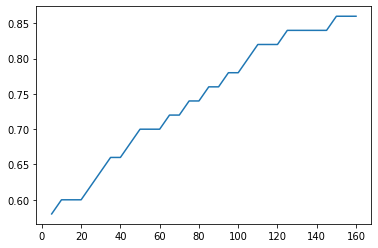

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_ard, y_ard)

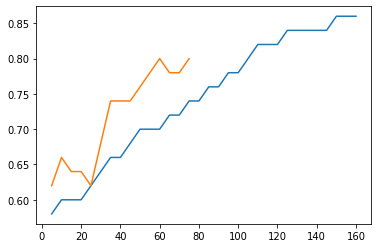

In [ ]:
plt.plot(x_ard, y_ard)
plt.plot(x_ard2, y_ard2)

In [ ]:
emaitza = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 1)

In [ ]:
print(emaitza)

poly([0.743125   0.14676136])


In [ ]:
emaitza

Polynomial([0.743125  , 0.14676136], domain=[  5., 160.], window=[-1.,  1.])

In [ ]:
type(emaitza)

numpy.polynomial.polynomial.Polynomial

In [ ]:
emaitza.coef

array([0.743125  , 0.14676136])

In [ ]:
emaitza(80)

0.7383907624633432

In [ ]:
x_hurbil, y_hurbil = emaitza.linspace(100, [3, 160])

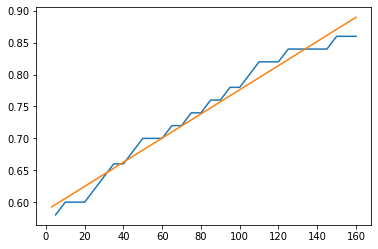

In [ ]:
plt.plot(x_ard, y_ard)
plt.plot(x_hurbil, y_hurbil)

In [ ]:
emaitza2 = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 2)

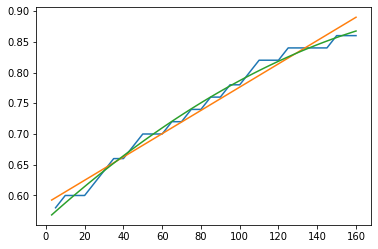

In [ ]:
x_hurbil2, y_hurbil2 = emaitza2.linspace(100, [3, 160])

plt.plot(x_ard, y_ard)
plt.plot(x_hurbil, y_hurbil)
plt.plot(x_hurbil2, y_hurbil2)

In [ ]:
emaitza2(3)

0.5683867043298257

In [ ]:
tarteak_kont = 9 * [0]

for i in range(len(lerroak_es)):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = len1 + len2 + len3
        len_konp = max([len1, len2, len3])
        atalasea = emaitza2(luzera)
        if sim1 > atalasea and sim2 > atalasea and sim3 > atalasea:
            if len_konp < 11:
                tarteak_kont[0] += 1
            elif len_konp < 21:
                tarteak_kont[1] += 1
            elif len_konp < 31:
                tarteak_kont[2] += 1
            elif len_konp < 41:
                tarteak_kont[3] += 1
            elif len_konp < 51:
                tarteak_kont[4] += 1
            elif len_konp < 61:
                tarteak_kont[5] += 1
            elif len_konp < 71:
                tarteak_kont[6] += 1
            elif len_konp < 81:
                tarteak_kont[7] += 1
            else:
                tarteak_kont[8] += 1

In [ ]:
for zenbat in tarteak_kont:
    print(zenbat)

130700
117642
66962
32326
13317
4512
1239
326
876


In [ ]:
tarteak_guzt = 9 * [0]

for i in range(len(lerroak_es)):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = max([len1, len2, len3])
        if luzera < 11:
            tarteak_guzt[0] += 1
        elif luzera < 21:
            tarteak_guzt[1] += 1
        elif luzera < 31:
            tarteak_guzt[2] += 1
        elif luzera < 41:
            tarteak_guzt[3] += 1
        elif luzera < 51:
            tarteak_guzt[4] += 1
        elif luzera < 61:
            tarteak_guzt[5] += 1
        elif luzera < 71:
            tarteak_guzt[6] += 1
        elif luzera < 81:
            tarteak_guzt[7] += 1
        else:
            tarteak_guzt[8] += 1

In [ ]:
for zenbat in tarteak_guzt:
    print(zenbat)

198704
179175
102213
54388
27859
14264
7332
3784
5051


In [ ]:
sum(tarteak_kont)

367900

In [ ]:
for tartea, tartea_guztira in zip(tarteak_kont, tarteak_guzt):
    print(tartea / tartea_guztira * 100)

65.77622997020694
65.65759732105484
65.5122146889339
59.43590497903949
47.801428622707206
31.632080762759397
16.898527004909983
8.61522198731501
17.343100376163136


       cos 0,7   mar 0,95   mar 1   hurbil2

0 -> % 42,17 - % 45,31 - % 33,71 - % 65,78

1 -> % 52,19 - % 64,14 - % 52,71 - % 65,66

2 -> % 64,50 - % 67,78 - % 57,59 - % 65,51

3 -> % 69,81 - % 69,02 - % 59,25 - % 59,44

4 -> % 74,48 - % 71,23 - % 60,89 - % 47,80

5 -> % 79,59 - % 74,28 - % 62,84 - % 31,63

6 -> % 83,80 - % 77,10 - % 65,37 - % 16,90

7 -> % 86,23 - % 78,82 - % 66,41 - % 8,62

8 -> % 90,17 - % 82,61 - % 70,12 - % 17,34

Guz: 346.357, 375.122, 306.150, Bib gabe: 367.900

In [ ]:
for i in range(9970, 10_070):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        antza = min([sim1, sim2, sim3])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = len1 + len2 + len3
        atalasea = emaitza2(luzera)
        if antza > atalasea:
            print(atalasea, antza, 'BAI')
        else:
            print(atalasea, antza, 'EZ')
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

0.7205238701052267 0.8014111 BAI
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

0.6300044462653096 0.6958681 BAI
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

0.6945426901845781 0.67186904 EZ
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did;
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

0.6762979774021045 0.5313047 EZ
Cocí unos hue

In [ ]:
for i in range(20_000, 20_100):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        antza = min([sim1, sim2, sim3])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = len1 + len2 + len3
        atalasea = emaitza2(luzera)
        if antza > atalasea:
            print(atalasea, antza, 'BAI')
        else:
            print(atalasea, antza, 'EZ')
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

0.6300044462653096 0.477359 EZ
-No seas impertinente-dije a mi diadka-; trae ahora mismo el tulup.
"Get the cloak quickly."
-Azkarrarena ez egin gero-esan nion haurtzainari-, ekar ezazu tulupa oraintxe bertan.

0.5739872994652406 0.55386215 EZ
-¡Dios misericordioso!
"Oh!
-Nagusi jauna!

0.5932255865102639 0.4303004 EZ
-gimió Savélich-.
good heavens!" exclaimed Savéliitch, bemoaning himself.
-esan zidan Savelitxek intzirika-.

0.6118979687769536 0.56114686 EZ
¡ Un tulup de conejo casi nuevo!
"A touloup of hareskin, and still quite new!
Erbi-larruzko tulupa berri-berria da!

0.6425911721580126 0.38360077 EZ
¡Y a quién se lo regala! ¡A ese borracho perdido!
And to whom is it given?-to a drunkard in rags."
Nori eta mozkor ziztrin bati eman behar diozu jantzi garesti hori?

0.6171289934448853 0.55208707 EZ
A pesar de todo, apareció el tulup de conejo.
However, the touloup was brought.
Hala eta guztiz, agertu zen erbi-larruzko tulupa.

0.6092651328273244 0.73313427 BAI
El muzbík empezó a pro

### Maximoen arabera

In [ ]:
tarteak = [[] for _ in range(100)]

for i in range(len(lerroak_es)):
    if i % 50_000 == 0: print(i)
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        luzera = max(len(hizkuntza[i].split()) for hizkuntza in [lerroak_es,
                                                                 lerroak_en,
                                                                 lerroak_eu])
        tartea = luzera // 2 - 1
        if luzera % 2 == 0 and luzera < 200:# and len(tarteak[tartea]) < 50:
            sim1 = similarity(embeddings_es[i], embeddings_en[i])
            sim2 = similarity(embeddings_es[i], embeddings_eu[i])
            sim3 = similarity(embeddings_en[i], embeddings_eu[i])
            sim = min([sim1, sim2, sim3])
            tarteak[tartea].append((i, sim, luzera))

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000


In [ ]:
for tartea in tarteak:
    print(len(tartea))

10357
20170
25236
24826
23246
20847
19361
17323
15601
14128
12306
11084
9785
8617
7602
6917
5894
5234
4479
3864
3485
2981
2629
2324
1984
1763
1563
1348
1171
1018
843
808
728
604
533
441
374
383
319
292
264
205
204
186
147
124
152
119
103
89
78
76
71
58
45
45
45
47
37
31
34
27
23
19
17
25
15
9
6
12
10
14
18
2
10
7
9
7
1
7
3
6
4
4
3
2
2
0
1
3
5
1
1
4
0
3
3
2
2
0


In [ ]:
tarte_zenb = 34

tartea = tarteak[tarte_zenb]
batzuk = [bat for bat in tartea if bat[1] > 0.88 and bat[1] < 0.9]
print(len(tartea), len(batzuk))
print()
erakusteko = random.sample(batzuk, 40)
for i, sim, luzera in erakusteko:
    print(luzera, sim)
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

533 59

70 0.89677346
Sus cabellos, cuyos bandós negros parecían cada uno de una sola pieza de lisos que estaban, se separaban por una raya fina que se hundía ligeramente siguiendo la curva del cráneo, y dejando ver apenas el lóbulo de la oreja, iban a recogerse por detrás en un moño abundante, con un movimiento ondulado hacia las sienes que el médico rural observó entonces por primera vez en su vida.
Her hair, whose two black folds seemed each of a single piece, so smooth were they, was parted in the middle by a delicate line that curved slightly with the curve of the head; and, just showing the tip of the ear, it was joined behind in a thick chignon, with a wavy movement at the temples that the country doctor saw now for the first time in his life.
Bere ilea, zeinaren bi adats beltzek bakoitza puska osokoa baitziruditen, hain ziren izan ere zapalak, buruaren erdian berezirik zegoen arroil fin batez, eta hau poliki-poliki hondoratzen zen buru-hezurraren makurdurari jarraiki; eta, bela

In [ ]:
# % 10 onartuz (40tik 4)

mugak = [[2, 0.56], [4, 0.58], [6, 0.62], [8, 0.64], [10, 0.66], [12, 0.64],
         [14, 0.72], [16, 0.7], [18, 0.72], [20, 0.74], [22, 0.74], [24, 0.78],
         [26, 0.78], [28, 0.8], [30, 0.8], [32, 0.8], [34, 0.82], [36, 0.84],
         [38, 0.82], [40, 0.84], [42, 0.84], [44, 0.84], [46, 0.84], [48, 0.84],
         [50, 0.84], [54, 0.86], [58, 0.84], [62, 0.86], [66, 0.86], [70, 0.88]]


In [ ]:
x_ard = [muga[0] for muga in mugak]
y_ard = [muga[1] for muga in mugak]

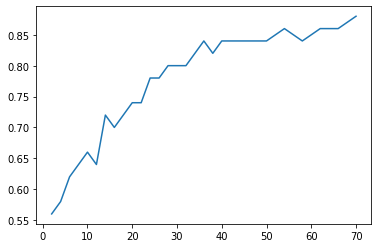

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_ard, y_ard)

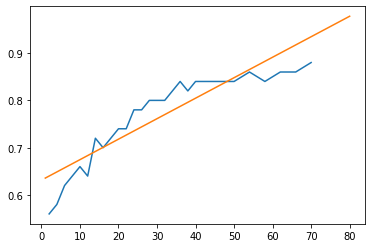

In [ ]:
zuzena = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 1)

x_hurbil, y_hurbil = zuzena.linspace(100, [1, 80])

plt.plot(x_ard, y_ard)
plt.plot(x_hurbil, y_hurbil)

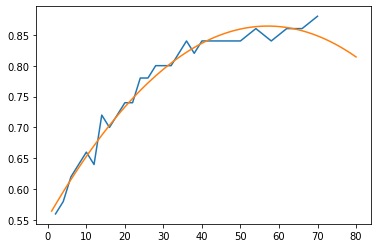

In [ ]:
parabola = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 2)

x_hurbil, y_hurbil = parabola.linspace(100, [1, 80])

plt.plot(x_ard, y_ard)
plt.plot(x_hurbil, y_hurbil)

In [ ]:
def logaritmikoa(x, a, b):
    return a * np.log(x) + b

In [ ]:
from scipy.optimize import curve_fit

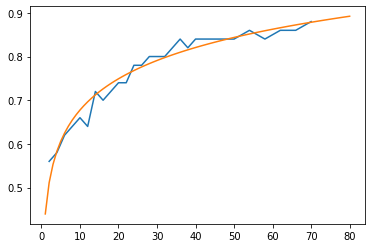

In [ ]:
popt, _ = curve_fit(logaritmikoa, x_ard, y_ard)
x_data = np.linspace(1, 80, 80)
y_hurbil = logaritmikoa(x_data, *popt)

plt.plot(x_ard, y_ard)
plt.plot(x_data, y_hurbil)

In [ ]:
logaritmikoa(1, *popt), logaritmikoa(2, *popt)

(0.4398204128269068, 0.5113796254256298)

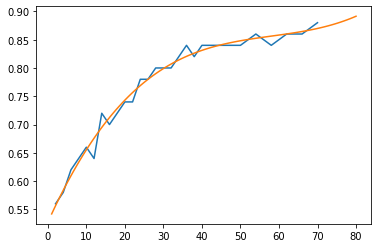

In [ ]:
maila_3 = np.polynomial.polynomial.Polynomial.fit(x_ard, y_ard, 3)

x_hurbil, y_hurbil = maila_3.linspace(100, [1, 80])

plt.plot(x_ard, y_ard)
plt.plot(x_hurbil, y_hurbil)

In [ ]:
def erroa2(x, a, b):
    return a * np.sqrt(x) + b

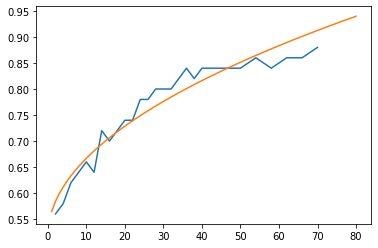

In [ ]:
popt, _ = curve_fit(erroa2, x_ard, y_ard)
x_data = np.linspace(1, 80, 80)
y_hurbil = erroa2(x_data, *popt)

plt.plot(x_ard, y_ard)
plt.plot(x_data, y_hurbil)

In [ ]:
def erroa3(x, a, b):
    return a * np.cbrt(x) + b

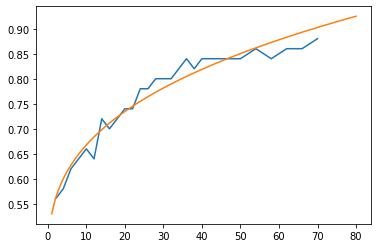

In [ ]:
popt, _ = curve_fit(erroa3, x_ard, y_ard)
x_data = np.linspace(1, 80, 80)
y_hurbil = erroa3(x_data, *popt)

plt.plot(x_ard, y_ard)
plt.plot(x_data, y_hurbil)

In [ ]:
def erroa(x, a, b, c):
    return a * np.power(x, b) + c

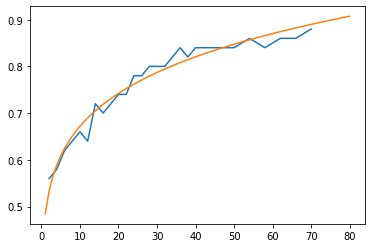

In [ ]:
popt, _ = curve_fit(erroa, x_ard, y_ard)
x_data = np.linspace(1, 80, 80)
y_hurbil = erroa(x_data, *popt)

plt.plot(x_ard, y_ard)
plt.plot(x_data, y_hurbil)

In [ ]:
popt

array([0.45018759, 0.15121535, 0.03400729])

In [ ]:
def atalase_fun(x):
    return erroa(x, *popt)

In [ ]:
atalase_fun(1), atalase_fun(2), atalase_fun(3), atalase_fun(4)

(0.48419488028637797,
 0.5339426738483569,
 0.5655541750814382,
 0.5891878268082607)

In [ ]:
tarteak_kont = 9 * [0]

for i in range(len(lerroak_es)):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        len_konp = max([len1, len2, len3])
        atalasea = atalase_fun(len_konp)
        if sim1 > atalasea and sim2 > atalasea and sim3 > atalasea:
            if len_konp < 11:
                tarteak_kont[0] += 1
            elif len_konp < 21:
                tarteak_kont[1] += 1
            elif len_konp < 31:
                tarteak_kont[2] += 1
            elif len_konp < 41:
                tarteak_kont[3] += 1
            elif len_konp < 51:
                tarteak_kont[4] += 1
            elif len_konp < 61:
                tarteak_kont[5] += 1
            elif len_konp < 71:
                tarteak_kont[6] += 1
            elif len_konp < 81:
                tarteak_kont[7] += 1
            else:
                tarteak_kont[8] += 1

In [ ]:
atalase_fun(60)

0.8701439898210928

In [ ]:
for zenbat in tarteak_kont:
    print(zenbat)

120583
88921
46477
21049
8450
2921
866
213
70


In [ ]:
sum(tarteak_kont)

289550

In [ ]:
for tartea, tartea_guztira in zip(tarteak_kont, tarteak_guzt):
    print(tartea / tartea_guztira * 100)

60.684737096384566
49.62801730152086
45.470732685666206
38.7015518128999
30.331311245916936
20.47812675266405
11.811238406983088
5.628964059196617
1.3858641853098397


       cos 0,7   mar 0,95   mar 1   hurbil2  zorrotza

0 -> % 42,17 - % 45,31 - % 33,71 - % 65,78 - % 60,68

1 -> % 52,19 - % 64,14 - % 52,71 - % 65,66 - % 49,63

2 -> % 64,50 - % 67,78 - % 57,59 - % 65,51 - % 45,47

3 -> % 69,81 - % 69,02 - % 59,25 - % 59,44 - % 38,70

4 -> % 74,48 - % 71,23 - % 60,89 - % 47,80 - % 30,33

5 -> % 79,59 - % 74,28 - % 62,84 - % 31,63 - % 20,47

6 -> % 83,80 - % 77,10 - % 65,37 - % 16,90 - % 11,81

7 -> % 86,23 - % 78,82 - % 66,41 - % 8,62  - % 5,63

8 -> % 90,17 - % 82,61 - % 70,12 - % 17,34 - % 1,39

    Bib -> BAI     BAI       BAI      EZ       EZ
Guz: 346.357, 375.122, 306.150, 367.900, 289.550

In [ ]:
for i in range(9970, 10_070):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        antza = min([sim1, sim2, sim3])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = max([len1, len2, len3])
        atalasea = atalase_fun(luzera)
        if antza > atalasea:
            print(atalasea, antza, 'BAI')
        else:
            print(atalasea, antza, 'EZ')
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

0.7750405384393221 0.8014111 BAI
Me di vuelta en la cama, busqué en la almohada el olor a sal que habían dejado allí los cabellos de María, y dormí hasta las diez.
So I turned my head and lazily sniffed the smell of brine that Marie's head had left on the pillow. I slept until ten.
Ohean jarraitu dut, Mari-ren usaina sumatu dut burukoan eta lo egin dut hamarrak arte.

0.6716962096539977 0.6958681 BAI
Luego estuve fumando cigarrillos hasta mediodía, siempre acostado.
After that I stayed in bed until noon, smoking cigarettes.
Zigarro batzuk erre ditut, ohean noski, eguerdia arte.

0.7524438702971088 0.67186904 EZ
No quería almorzar en el restaurante de Celeste como de costumbre, porque indudablemente me hubieran formulado preguntas, cosa que no me gusta.
I decided not to lunch at Céleste's restaurant as I usually did;
Ez nuen besteetan bezala Celeste-ren etxean bazkaltzeko gogorik. Izan ere galdera asko egingo zizkidan eta hori ez dut maite.

0.7366923090775201 0.5313047 EZ
Cocí unos hue

In [ ]:
for i in range(20_000, 20_100):
    if lerroak_es[i] and lerroak_en[i] and lerroak_eu[i]:
        sim1 = similarity(embeddings_es[i], embeddings_en[i])
        sim2 = similarity(embeddings_es[i], embeddings_eu[i])
        sim3 = similarity(embeddings_en[i], embeddings_eu[i])
        antza = min([sim1, sim2, sim3])
        len1 = len(lerroak_es[i].split())
        len2 = len(lerroak_en[i].split())
        len3 = len(lerroak_eu[i].split())
        luzera = max([len1, len2, len3])
        atalasea = atalase_fun(luzera)
        if antza > atalasea:
            print(atalasea, antza, 'BAI')
        else:
            print(atalasea, antza, 'EZ')
    print(lerroak_es[i])
    print(lerroak_en[i])
    print(lerroak_eu[i])
    print()

0.6809533619194582 0.477359 EZ
-No seas impertinente-dije a mi diadka-; trae ahora mismo el tulup.
"Get the cloak quickly."
-Azkarrarena ez egin gero-esan nion haurtzainari-, ekar ezazu tulupa oraintxe bertan.

0.5339426738483569 0.55386215 BAI
-¡Dios misericordioso!
"Oh!
-Nagusi jauna!

0.6242925439398457 0.4303004 EZ
-gimió Savélich-.
good heavens!" exclaimed Savéliitch, bemoaning himself.
-esan zidan Savelitxek intzirika-.

0.6505378225977372 0.56114686 EZ
¡ Un tulup de conejo casi nuevo!
"A touloup of hareskin, and still quite new!
Erbi-larruzko tulupa berri-berria da!

0.6809533619194582 0.38360077 EZ
¡Y a quién se lo regala! ¡A ese borracho perdido!
And to whom is it given?-to a drunkard in rags."
Nori eta mozkor ziztrin bati eman behar diozu jantzi garesti hori?

0.6616169735606969 0.55208707 EZ
A pesar de todo, apareció el tulup de conejo.
However, the touloup was brought.
Hala eta guztiz, agertu zen erbi-larruzko tulupa.

0.638213683453932 0.73313427 BAI
El muzbík empezó a pro

In [ ]:
def beste_bat(x, a, b, c):
    return a/x + b*x + c

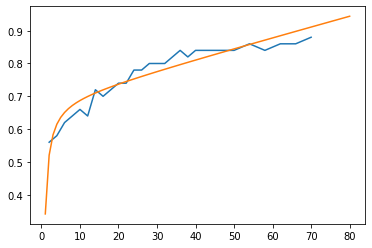

In [ ]:
popt, _ = curve_fit(beste_bat, x_ard, y_ard)
x_data = np.linspace(1, 80, 80)
y_hurbil = beste_bat(x_data, *popt)

plt.plot(x_ard, y_ard)
plt.plot(x_data, y_hurbil)

In [ ]:
# % 5 bakarrik onartuz (40tik 2)

mugak = [[2, 0.6], [4, 0.66], [6, 0.62], [8, 0.64], [10, 0.66], [12, 0.74],
         [14, 0.74], [16, 0.74], [18, 0.76], [20, 0.78], [22, 0.78], [24, 0.8],
         [26, 0.82]]

# 26 0.8 0.82

In [ ]:
x_ard = [muga[0] for muga in mugak]
y_ard = [muga[1] for muga in mugak]

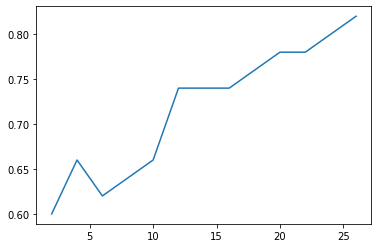

In [ ]:
plt.plot(x_ard, y_ard)

# Train-Val banaketa

## HAC

In [ ]:
with open('EhuHac/EhuHac-es.txt') as fitx:
    lerroak_es = [lerroa[:-1] for lerroa in fitx]
with open('EhuHac/EhuHac-en.txt') as fitx:
    lerroak_en = [lerroa[:-1] for lerroa in fitx]
with open('EhuHac/EhuHac-eu.txt') as fitx:
    lerroak_eu = [lerroa[:-1] for lerroa in fitx]

In [ ]:
import time

In [ ]:
import random

random.seed(4)

haut_indizeak = random.sample(range(len(lerroak_es)), 2000)

hautagaiak_es = []
hautagaiak_en = []
hautagaiak_eu = []

train_es = []
train_en = []
train_eu = []

hasi = time.time()

haut_indizeak = set(haut_indizeak)

for i in range(len(lerroak_es)):
    if i in haut_indizeak:
        hautagaiak_es.append(lerroak_es[i])
        hautagaiak_en.append(lerroak_en[i])
        hautagaiak_eu.append(lerroak_eu[i])
    else:
        train_es.append(lerroak_es[i])
        train_en.append(lerroak_en[i])
        train_eu.append(lerroak_eu[i])
    
print(time.time() - hasi)

0.45145606994628906


In [ ]:
with open('EhuHac/EhuHac-trainorig-es.txt', 'w') as fitx:
    fitx.write('\n'.join(train_es))
with open('EhuHac/EhuHac-trainorig-en.txt', 'w') as fitx:
    fitx.write('\n'.join(train_en))
with open('EhuHac/EhuHac-trainorig-eu.txt', 'w') as fitx:
    fitx.write('\n'.join(train_eu))

embed_es = laser.embed_sentences(hautagaiak_es, 'es')
embed_en = laser.embed_sentences(hautagaiak_en, 'en')
embed_eu = laser.embed_sentences(hautagaiak_eu, 'eu')

baturak = []
for i in range(len(hautagaiak_es)):
    batura = 0
    if hautagaiak_es[i] and hautagaiak_en[i]:
        batura += similarity(embed_es[i], embed_en[i])
    if hautagaiak_es[i] and hautagaiak_eu[i]:
        batura += similarity(embed_es[i], embed_eu[i])
    if hautagaiak_en[i] and hautagaiak_eu[i]:
        batura += similarity(embed_en[i], embed_eu[i])
    baturak.append(batura)

baturak = np.array(baturak)
ordenatuta = baturak.argsort()

val_es = []
val_en = []
val_eu = []
for indizea in ordenatuta[::-1][:1000]:
    val_es.append(hautagaiak_es[indizea])
    val_en.append(hautagaiak_en[indizea])
    val_eu.append(hautagaiak_eu[indizea])

with open('EhuHac/EhuHac-val-es.txt', 'w') as fitx:
    fitx.write('\n'.join(val_es))
with open('EhuHac/EhuHac-val-en.txt', 'w') as fitx:
    fitx.write('\n'.join(val_en))
with open('EhuHac/EhuHac-val-eu.txt', 'w') as fitx:
    fitx.write('\n'.join(val_eu))

In [ ]:
haut_indizeak

{65544,
 49161,
 557065,
 344080,
 229398,
 262169,
 65571,
 491558,
 147500,
 450605,
 262193,
 647230,
 196673,
 311362,
 606285,
 442446,
 630861,
 73807,
 180306,
 73811,
 360534,
 376919,
 172120,
 393305,
 73821,
 270430,
 393316,
 295013,
 606313,
 245865,
 131181,
 548979,
 417914,
 196733,
 254077,
 589952,
 639111,
 57484,
 426128,
 139410,
 499859,
 163988,
 8341,
 319637,
 180377,
 647329,
 630946,
 155813,
 311462,
 639143,
 106665,
 286903,
 49340,
 24776,
 270539,
 221391,
 516306,
 254163,
 622808,
 196828,
 631021,
 90353,
 401650,
 385267,
 639223,
 98555,
 508157,
 549129,
 221454,
 573712,
 205073,
 524564,
 139544,
 82204,
 647453,
 327970,
 598307,
 500008,
 352558,
 155951,
 98607,
 33073,
 352562,
 524598,
 344375,
 483641,
 327997,
 57664,
 98629,
 229702,
 450887,
 303432,
 459079,
 590150,
 491847,
 360787,
 368980,
 131417,
 270682,
 65908,
 336245,
 606584,
 639354,
 385404,
 369024,
 557446,
 82317,
 508305,
 344477,
 33187,
 532902,
 270762,
 188847,
 451

In [ ]:
min(haut_indizeak)

593

In [ ]:
baturak.sort()

In [ ]:
baturak[1900:]

array([2.66520691, 2.66550404, 2.66660351, 2.66753662, 2.66812152,
       2.66879034, 2.66881871, 2.669918  , 2.66996557, 2.67022598,
       2.67155105, 2.67205006, 2.67228407, 2.67315179, 2.67335653,
       2.67358655, 2.67436165, 2.67463499, 2.67657501, 2.67684954,
       2.67734003, 2.67788351, 2.67817062, 2.67836499, 2.67975277,
       2.68365341, 2.68454981, 2.68610823, 2.68690139, 2.68701947,
       2.68709147, 2.68966806, 2.6899091 , 2.69069564, 2.69101453,
       2.69564873, 2.69599837, 2.69638175, 2.69667411, 2.69813591,
       2.69815469, 2.69849777, 2.69865167, 2.69930834, 2.70003569,
       2.70164835, 2.70177054, 2.70309526, 2.70340908, 2.70454305,
       2.70552015, 2.70569915, 2.70944846, 2.71027964, 2.71071345,
       2.71303535, 2.71391195, 2.71619159, 2.71641505, 2.71702325,
       2.71776015, 2.71808404, 2.71921861, 2.72104961, 2.72127396,
       2.7219522 , 2.72357583, 2.72404921, 2.72433281, 2.72618872,
       2.72686261, 2.72700495, 2.72844321, 2.73009813, 2.73025

## HAC

In [ ]:
with open('EhuHac/EhuHac-es.txt') as fitx:
    lerroak_es = [lerroa[:-1] for lerroa in fitx]
with open('EhuHac/EhuHac-en.txt') as fitx:
    lerroak_en = [lerroa[:-1] for lerroa in fitx]
with open('EhuHac/EhuHac-eu.txt') as fitx:
    lerroak_eu = [lerroa[:-1] for lerroa in fitx]

In [ ]:
import time

In [ ]:
import random

random.seed(4)

haut_indizeak = random.sample(range(len(lerroak_es)), 2000)

hautagaiak_es = []
hautagaiak_en = []
hautagaiak_eu = []

train_es = []
train_en = []
train_eu = []

hasi = time.time()

haut_indizeak = set(haut_indizeak)

for i in range(len(lerroak_es)):
    if i in haut_indizeak:
        hautagaiak_es.append(lerroak_es[i])
        hautagaiak_en.append(lerroak_en[i])
        hautagaiak_eu.append(lerroak_eu[i])
    else:
        train_es.append(lerroak_es[i])
        train_en.append(lerroak_en[i])
        train_eu.append(lerroak_eu[i])
    
print(time.time() - hasi)

0.49668407440185547


In [ ]:


embed_es = laser.embed_sentences(hautagaiak_es, 'es')
embed_en = laser.embed_sentences(hautagaiak_en, 'en')
embed_eu = laser.embed_sentences(hautagaiak_eu, 'eu')

baturak = []
for i in range(len(hautagaiak_es)):
    batura = 0
    if hautagaiak_es[i] and hautagaiak_en[i]:
        batura += similarity(embed_es[i], embed_en[i])
    if hautagaiak_es[i] and hautagaiak_eu[i]:
        batura += similarity(embed_es[i], embed_eu[i])
    if hautagaiak_en[i] and hautagaiak_eu[i]:
        batura += similarity(embed_en[i], embed_eu[i])
    baturak.append(batura)

baturak = np.array(baturak)
ordenatuta = baturak.argsort()

val_es = []
val_en = []
val_eu = []
for indizea in ordenatuta[::-1][:1000]:
    val_es.append(hautagaiak_es[indizea])
    val_en.append(hautagaiak_en[indizea])
    val_eu.append(hautagaiak_eu[indizea])


In [ ]:
haut_indizeak

{65544,
 49161,
 557065,
 344080,
 229398,
 262169,
 65571,
 491558,
 147500,
 450605,
 262193,
 647230,
 196673,
 311362,
 606285,
 442446,
 630861,
 73807,
 180306,
 73811,
 360534,
 376919,
 172120,
 393305,
 73821,
 270430,
 393316,
 295013,
 606313,
 245865,
 131181,
 548979,
 417914,
 196733,
 254077,
 589952,
 639111,
 57484,
 426128,
 139410,
 499859,
 163988,
 8341,
 319637,
 180377,
 647329,
 630946,
 155813,
 311462,
 639143,
 106665,
 286903,
 49340,
 24776,
 270539,
 221391,
 516306,
 254163,
 622808,
 196828,
 631021,
 90353,
 401650,
 385267,
 639223,
 98555,
 508157,
 549129,
 221454,
 573712,
 205073,
 524564,
 139544,
 82204,
 647453,
 327970,
 598307,
 500008,
 352558,
 155951,
 98607,
 33073,
 352562,
 524598,
 344375,
 483641,
 327997,
 57664,
 98629,
 229702,
 450887,
 303432,
 459079,
 590150,
 491847,
 360787,
 368980,
 131417,
 270682,
 65908,
 336245,
 606584,
 639354,
 385404,
 369024,
 557446,
 82317,
 508305,
 344477,
 33187,
 532902,
 270762,
 188847,
 451

In [ ]:
min(haut_indizeak)

593

In [ ]:
baturak[ordenatuta[:1000]]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34409475, 0.362939  , 0.56428343, 0.58322692,
       0.6048255 , 0.61896616, 0.64519727, 0.65188706, 0.69459784,
       0.70582449, 0.71338844, 0.72710311, 0.74441344, 0.75999373,
       0.78542873, 0.79730177, 0.80148798, 0.80746812, 0.80905277,
       0.82043236, 0.82081366, 0.84039988, 0.84153271, 0.85499817,
       0.85606933, 0.86767685, 0.91701078, 0.91944636, 0.94123662,
       0.94218186, 0.95151383, 0.95290425, 0.96653011, 0.99585

In [ ]:
baturak[ordenatuta[1000:]]

array([2.3039037 , 2.30411273, 2.30467021, 2.30518734, 2.30528724,
       2.30530089, 2.30531275, 2.30605692, 2.30691093, 2.30692339,
       2.3081488 , 2.30824184, 2.30888867, 2.30916864, 2.30999416,
       2.31110889, 2.31151712, 2.31225091, 2.31229073, 2.31229448,
       2.3126573 , 2.31332523, 2.31394261, 2.3141036 , 2.31428105,
       2.31428701, 2.31442255, 2.31472468, 2.31488192, 2.31541836,
       2.31556374, 2.31556809, 2.31593275, 2.31611657, 2.31644273,
       2.31759638, 2.31761831, 2.32015604, 2.32040668, 2.32046098,
       2.32074332, 2.32132989, 2.32166797, 2.32285988, 2.32316726,
       2.32317239, 2.32423574, 2.32473934, 2.32501441, 2.32615429,
       2.32643563, 2.32771528, 2.32850343, 2.32871032, 2.32894266,
       2.33103228, 2.33168191, 2.33247352, 2.33345836, 2.33350378,
       2.33354986, 2.33453828, 2.33504969, 2.33525759, 2.33571506,
       2.33572882, 2.33596593, 2.33618313, 2.33622539, 2.33639014,
       2.33692354, 2.33744717, 2.33756632, 2.33817023, 2.33832

In [ ]:
for indizea in ordenatuta[::-1][1000:]:
    print(hautagaiak_es[indizea])
    print(hautagaiak_en[indizea])
    print(hautagaiak_eu[indizea])
    print()

Volviendo por un momento a los animales:
Turning for a brief space to animals:
Animaliengana laburki berriz etorririk:

Esperó un poco, sin dejar de mirar la hoja.
He waited for a moment, still looking at the sheet of paper, then sat down.
Pixka batean itxaron zuen, betiere orriari begiratuz, eta eseri egin zen ondoren.

trataré, al menos, de que sea lo más tarde posible.
I will try, at all events, to arrange that it shall be realized as late in life as possible.
gutxienez, ahalik eta beranduen gauza dadin ahaleginduko naiz.

"La segunda norma que el conde te recomienda es ésta:
"The second idea which the Conte sends you is this:
"Hona kondearen bigarren aholkua:

Lo mismo que a nosotros nos parecen distintos, siendo los mismos, los fármacos de los médicos cuando están variados con colores y olores-mientras que al médico, en tanto que observa la virtud de los fármacos, le parecen los mismos y no se deja impresionar por los elementos añadidos-, de la misma forma, quizás, también el expe

## OpenSubtitles

In [ ]:
with open('OpenSubtitles/OS-haut-es.txt') as fitx:
    hautagaiak_es = fitx.read().split('\n')
with open('OpenSubtitles/OS-haut-en.txt') as fitx:
    hautagaiak_en = fitx.read().split('\n')
with open('OpenSubtitles/OS-haut-eu.txt') as fitx:
    hautagaiak_eu = fitx.read().split('\n')

In [ ]:
embed_es = laser.embed_sentences(hautagaiak_es, 'es')
embed_en = laser.embed_sentences(hautagaiak_en, 'en')
embed_eu = laser.embed_sentences(hautagaiak_eu, 'eu')

baturak = []
for i in range(len(hautagaiak_es)):
    batura = 0
    if hautagaiak_es[i] and hautagaiak_en[i]:
        batura += similarity(embed_es[i], embed_en[i])
    if hautagaiak_es[i] and hautagaiak_eu[i]:
        batura += similarity(embed_es[i], embed_eu[i])
    if hautagaiak_en[i] and hautagaiak_eu[i]:
        batura += similarity(embed_en[i], embed_eu[i])
    baturak.append(batura)

baturak = np.array(baturak)
ordenatuta = baturak.argsort()

val_es = []
val_en = []
val_eu = []
for indizea in ordenatuta[::-1][:1000]:
    val_es.append(hautagaiak_es[indizea])
    val_en.append(hautagaiak_en[indizea])
    val_eu.append(hautagaiak_eu[indizea])

In [ ]:
baturak[ordenatuta[:1000]]

array([0.        , 0.97353542, 1.21341589, 1.2406231 , 1.24327013,
       1.27122757, 1.30129987, 1.32441416, 1.32606369, 1.33150825,
       1.33299369, 1.33581385, 1.35458288, 1.36832087, 1.37734482,
       1.37840945, 1.37843022, 1.38503382, 1.39285371, 1.39647758,
       1.40883723, 1.41327831, 1.43126559, 1.44431221, 1.44507012,
       1.46668825, 1.48795101, 1.48958641, 1.49020556, 1.49288028,
       1.50112829, 1.50347739, 1.51422414, 1.51441696, 1.51917821,
       1.53682336, 1.5384734 , 1.54925665, 1.55562431, 1.55963707,
       1.56173277, 1.56386772, 1.56869495, 1.57321838, 1.57571501,
       1.58105439, 1.58367595, 1.58449599, 1.58550256, 1.59070295,
       1.59342048, 1.60212514, 1.60606509, 1.61408558, 1.6155982 ,
       1.62645525, 1.6270549 , 1.62880468, 1.63015655, 1.63020745,
       1.63085929, 1.63218418, 1.63259849, 1.6347338 , 1.63531756,
       1.63859001, 1.64381513, 1.64584497, 1.64698514, 1.65624025,
       1.66157532, 1.67178676, 1.67332143, 1.67546442, 1.68036

In [ ]:
baturak[ordenatuta[1000:1500]]

array([2.39900714, 2.40115446, 2.40154952, 2.40168059, 2.40171701,
       2.402035  , 2.40276599, 2.40280503, 2.40307498, 2.40313053,
       2.40387118, 2.40421796, 2.40425283, 2.40442181, 2.40450931,
       2.40493149, 2.40540123, 2.40602368, 2.40701556, 2.40708017,
       2.40744245, 2.40781891, 2.40835917, 2.40912253, 2.40943819,
       2.40986174, 2.40993679, 2.41069973, 2.4108783 , 2.41093373,
       2.4109444 , 2.41128033, 2.41133392, 2.41245437, 2.41296291,
       2.41333354, 2.41338652, 2.41346371, 2.41356796, 2.4143042 ,
       2.41458154, 2.41557735, 2.41663671, 2.41672325, 2.41810548,
       2.4189409 , 2.41903138, 2.41936576, 2.42055941, 2.42066473,
       2.42104036, 2.42113334, 2.42244768, 2.42281961, 2.42303747,
       2.42337048, 2.42367733, 2.42411345, 2.42422861, 2.42470235,
       2.42520809, 2.42522788, 2.4253509 , 2.42583048, 2.42672151,
       2.42678076, 2.42689359, 2.42744273, 2.42746192, 2.42746669,
       2.42751354, 2.42827302, 2.42851681, 2.42862707, 2.42906

In [ ]:
baturak[ordenatuta[1500:]]

array([2.59875232, 2.59959757, 2.59976178, 2.60062963, 2.60103989,
       2.6011616 , 2.6020242 , 2.6020419 , 2.60205984, 2.60211015,
       2.60232013, 2.60343057, 2.60381746, 2.60407859, 2.60411823,
       2.60485101, 2.60512727, 2.60560942, 2.60568142, 2.60569412,
       2.60667956, 2.60668981, 2.60690606, 2.60696226, 2.60788918,
       2.60842192, 2.60894865, 2.60932761, 2.61007798, 2.61031973,
       2.61065435, 2.61092335, 2.61104745, 2.61124074, 2.6121819 ,
       2.61241674, 2.61248487, 2.61257875, 2.61315858, 2.61361599,
       2.61374354, 2.61381626, 2.61395979, 2.61401409, 2.61444163,
       2.61460382, 2.61512673, 2.6151346 , 2.61582577, 2.6158796 ,
       2.61662829, 2.61673331, 2.61677444, 2.61686927, 2.61700797,
       2.61725116, 2.61733931, 2.61757684, 2.61823994, 2.61846155,
       2.61891532, 2.61919159, 2.61980796, 2.6201157 , 2.62025005,
       2.62054271, 2.62094474, 2.62097794, 2.62157208, 2.62235016,
       2.62280232, 2.62315971, 2.62347817, 2.6239742 , 2.62425

In [ ]:
for indizea in ordenatuta[::-1][1000:]:
    print(hautagaiak_es[indizea])
    print(hautagaiak_en[indizea])
    print(hautagaiak_eu[indizea])
    print()

- De acuerdo.
- Okay.
Ondo.

¿Está de juerga, cariño?
Is he on a bender, sweetheart?
Parrandan dago, maitea?

- ¡Escóndeme!
- But, Rick, hide me.
- Rick, ezkuta nazazu.

Represento en cierta forma a la productora de la película.
- I represent the film production.
Filmaren produkzioaren ordezkari gisako bat naiz.

Mi padre murió más rico de lo que Ud. nunca será.
Well, in my book, he died a much richer man than you'll ever be.
Zu sekula izango zaren baino aberatsago hil zen nire aita.

Sauna, y después asígnenos una habitación.
Sauna, and then give us a room.
Sauna, baina gela ere hartuko dugu.

"¡Oh, hombres sabios!
"Oh, learned men!
"O, jakintsuok!

¿Pero podría curar su locura ahora?
Yet could I cure their madness now?
Ba ote dago eromena orain sendatzeko nodurik?

- Creo que deberíamos arreglar esto.
- Well, I guess we should fix that.
-Konpondu egin beharko diagu.

Nunca vi menos delicadeza.
I've never known such little regard for human frailty.
Inoiz ez dut ikusi hainbeste gutxies

In [ ]:
for indizea in ordenatuta[::-1][:1000]:
    print(hautagaiak_es[indizea])
    print(hautagaiak_en[indizea])
    print(hautagaiak_eu[indizea])
    print()

- Benjamin.
- Benjamin.
- Benjamin.

Tommy.
Tommy.
Tommy.

Ronaldo.
Ronaldo.
Ronaldo.

Clif...
Clif...
Clif...

Klaus.
Klaus.
Klaus.

Zara ...
Zara...
Zara ...

♪ But love is more important than a diamond ring
♪ But love is more important than a diamond ring
♪ But love is more important than a diamond ring

Caroline.
Caroline.
Caroline.

- Mansfield?
- Mansfield?
-Mansfield?

¿Lambda Lambda Lambda?
Lambda Lambda Lambda?
Lambda Lambda Lambda?

- Sí, Clayton.
- Yes, Clayton.
- Bai, Clayton.

- ¡Jamie!
- Jamie!
- Jamie!

Hakuna Matata!
Hakuna matata.
Hakuna matata.

- Hola, Anette.
- Hi, Anette.
- Kaixo, Anette.

Adiós, Albert.
Goodbye, Albert.
Agur, Albert.

- Sir William.
- Sir William!
- Sir William!

Reese, ¿qué?
Reese, what?
Reese, zer?

- ¡Veda!
- Veda!
- Veda!

¿Haru?
Haru?
Haru?

Falina.
Faline.
Faline.

¿Veronica?
Veronica?
Veronica?

¿Gray?
Gray?
Gray?

- ¿Denise?
- Denise ?
-Denise?

Bienvenido a Metrópolis, Jeremy.
Welcome to Metropolis, Jeremy.
Ongi etorri Metropolisera, Jere

In [ ]:
with open('OpenSubtitles/OS-val-es.txt', 'w') as fitx:
    fitx.write('\n'.join(val_es))
with open('OpenSubtitles/OS-val-en.txt', 'w') as fitx:
    fitx.write('\n'.join(val_en))
with open('OpenSubtitles/OS-val-eu.txt', 'w') as fitx:
    fitx.write('\n'.join(val_eu))